<a href="https://colab.research.google.com/github/Subibub/ML/blob/main/allstate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Î≥¥Ìóò ÏÜêÌï¥ ÏòàÏ∏° Î∞è Î≥¥ÌóòÎ£å ÏÇ∞Ï∂ú Î™®Îç∏ÎßÅ

In [1]:
!apt-get install -y libboost-all-dev
!git clone --recursive https://github.com/Microsoft/LightGBM
%cd LightGBM
!mkdir build
%cd build
!cmake -DUSE_GPU=1 ..
!make -j4
%cd ..
!python3 setup.py install

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libboost-all-dev is already the newest version (1.74.0.3ubuntu7).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
Cloning into 'LightGBM'...
remote: Enumerating objects: 35281, done.
remote: Counting objects: 100% (5418/5418), done.
remote: Compressing objects: 100% (550/550), done.
remote: Total 35281 (delta 5184), reused 4876 (delta 4867), pack-reused 29863 (from 3)
Receiving objects: 100% (35281/35281), 23.30 MiB | 8.87 MiB/s, done.
Resolving deltas: 100% (26318/26318), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'external_libs/compute'
Submodule 'eigen' (https://gitlab.com/libeigen/eigen.git) registered for path 'external_libs/eigen'
Submodule 'external_libs/fast_double_parser' (https://github.com/lemire/fast_double_parser.git) registered for path 'external_libs/fast_double_parser'
Submodule 'external_libs/fmt' (https

## 1. Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è Í∏∞Î≥∏ Ï†ÑÏ≤òÎ¶¨

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

# Í≤ΩÍ≥† Î©îÏãúÏßÄ ÏñµÏ†ú
import warnings
warnings.filterwarnings('ignore')

# Í∑∏ÎûòÌîÑ Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')


In [2]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
from google.colab import drive
drive.mount('/content/drive')

train_df = pd.read_csv('/content/drive/MyDrive/Allstate/train.csv')
print(f"ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {train_df.shape}")
train_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (188318, 132)


id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont6     cont7  \
0   1    A    B    A    B    A    A    A    A    B  ...  0.718367  0.335060   
1   2    A    B    A    A    A    A    A    A    B  ...  0.438917  0.436585   
2   5    A    B    A    A    B    A    A    A    B  ...  0.289648  0.315545   
3  10    B    B    A    B    A    A    A    A    B  ...  0.440945  0.391128   
4  11    A    B    A    B    A    A    A    A    B  ...  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642   939.85  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  2763.85  

[5 rows x 132 columns]

In [3]:
#test Îç∞Ïù¥ÌÑ∞ Î°úÎìú
test_df = pd.read_csv("/content/drive/MyDrive/Allstate/test.csv")
test_df['loss'] = np.nan  # ÌÖåÏä§Ìä∏ÏÖã ÏÜêÏã§Í∞í ÏûêÎ¶¨ ÌôïÎ≥¥
print(f"ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {test_df.shape}")
test_df.head()

ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (125546, 132)


id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont6     cont7  \
0   4    A    B    A    A    A    A    A    A    B  ...  0.466591  0.317681   
1   6    A    B    A    B    A    A    A    A    B  ...  0.482425  0.443760   
2   9    A    B    A    B    B    A    B    A    B  ...  0.212308  0.325779   
3  12    A    A    A    A    B    A    A    A    A  ...  0.369930  0.342355   
4  15    B    A    A    A    A    B    A    A    A  ...  0.398862  0.391833   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14 loss  
0  0.61229  0.34365  0.38016  0.377724  0.369858  0.704052  0.392562  NaN  
1  0.71330  0.51890  0.60401  0.689039  0.675759  0.453468  0.208045  NaN  
2  0.29758  0.34365  0.30529  0.245410  0.241676  0.258586  0.297232  NaN  
3  0.40028  0.33237  0.31480  0.348867  0.341872  0.592264  0.555955  NaN  
4  0.23688  0.43731  0.50556  0.359572  0.352251  0.301535  0.825823  NaN  

[5 rows x 132 columns]

In [4]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
print("ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Ïπò ÌôïÏù∏:")
print(train_df.isnull().sum())
print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Ïπò ÌôïÏù∏:")
print(test_df.isnull().sum())

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Ïπò ÌôïÏù∏:
id        0
cat1      0
cat2      0
cat3      0
cat4      0
         ..
cont11    0
cont12    0
cont13    0
cont14    0
loss      0
Length: 132, dtype: int64
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Ïπò ÌôïÏù∏:
id             0
cat1           0
cat2           0
cat3           0
cat4           0
           ...  
cont11         0
cont12         0
cont13         0
cont14         0
loss      125546
Length: 132, dtype: int64


In [5]:
# Î≥ÄÏàò ÌÉÄÏûÖ Î∂ÑÎ¶¨
cat_features = [col for col in train_df.columns if 'cat' in col]
cont_features = [col for col in train_df.columns if 'cont' in col]

In [6]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ (Í∞Å Ïó¥Ïùò ÌèâÍ∑†ÏúºÎ°ú ÎåÄÏ≤¥)
for col in cont_features:
    if train_df[col].isnull().sum() > 0:
        mean_val = train_df[col].mean()
        train_df[col].fillna(mean_val, inplace=True)
        test_df[col].fillna(mean_val, inplace=True)

for col in cat_features:
    if train_df[col].isnull().sum() > 0:
        mode_val = train_df[col].mode()[0]
        train_df[col].fillna(mode_val, inplace=True)
        test_df[col].fillna(mode_val, inplace=True)


In [7]:
# Í∏∞Î≥∏ ÌÜµÍ≥ÑÎüâ ÌôïÏù∏
train_df.describe().T

count           mean            std       min            25%  \
id      188318.0  294135.982561  169336.084867  1.000000  147748.250000   
cont1   188318.0       0.493861       0.187640  0.000016       0.346090   
cont2   188318.0       0.507188       0.207202  0.001149       0.358319   
cont3   188318.0       0.498918       0.202105  0.002634       0.336963   
cont4   188318.0       0.491812       0.211292  0.176921       0.327354   
cont5   188318.0       0.487428       0.209027  0.281143       0.281143   
cont6   188318.0       0.490945       0.205273  0.012683       0.336105   
cont7   188318.0       0.484970       0.178450  0.069503       0.350175   
cont8   188318.0       0.486437       0.199370  0.236880       0.312800   
cont9   188318.0       0.485506       0.181660  0.000080       0.358970   
cont10  188318.0       0.498066       0.185877  0.000000       0.364580   
cont11  188318.0       0.493511       0.209737  0.035321       0.310961   
cont12  188318.0       0.493150       0.209427  0.036232       0.311661   
cont13  188318.0       0.493138       0.212777  0.000228       0.315758   
cont14  188318.0       0.495717       0.222488  0.179722       0.294610   
loss    188318.0    3037.337686    2904.086186  0.670000    1204.460000   

                  50%            75%            max  
id      294539.500000  440680.500000  587633.000000  
cont1        0.475784       0.623912       0.984975  
cont2        0.555782       0.681761       0.862654  
cont3        0.527991       0.634224       0.944251  
cont4        0.452887       0.652072       0.954297  
cont5        0.422268       0.643315       0.983674  
cont6        0.440945       0.655021       0.997162  
cont7        0.438285       0.591045       1.000000  
cont8        0.441060       0.623580       0.980200  
cont9        0.441450       0.566820       0.995400  
cont10       0.461190       0.614590       0.994980  
cont11       0.457203       0.678924       0.998742  
cont12       0.462286       0.675759       0.998484  
cont13       0.363547       0.689974       0.988494  
cont14       0.407403       0.724623       0.844848  
loss      2115.570000    3864.045000  121012.250000

## 2. ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù(EDA)

Text(0.5, 1.0, 'Loss Distribution')

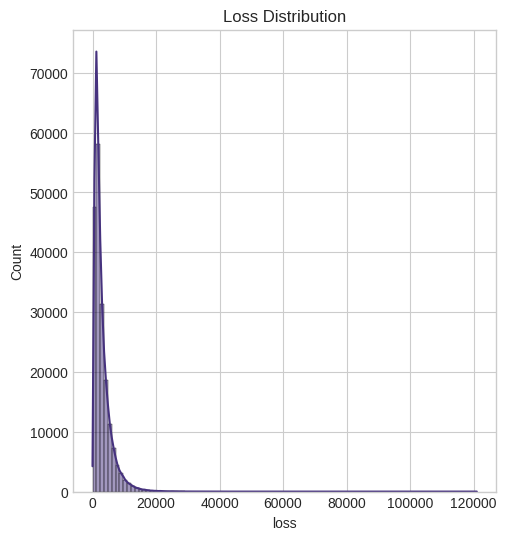

In [8]:
# ÌÉÄÍ≤ü Î≥ÄÏàò(loss) Î∂ÑÌè¨ ÌôïÏù∏
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_df['loss'], bins=100, kde=True)
plt.title("Loss Distribution")


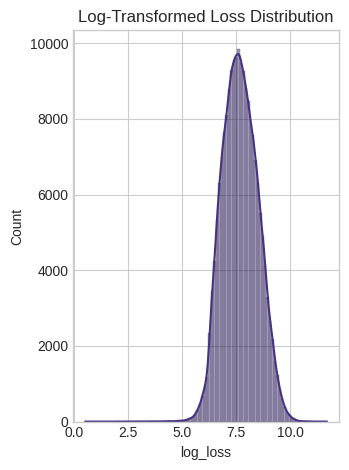

In [9]:
# Î°úÍ∑∏ Î≥ÄÌôò ÌõÑ Ï†ïÍ∑ú Î∂ÑÌè¨ ÌôïÏù∏
plt.subplot(1, 2, 2)
train_df['log_loss'] = np.log1p(train_df['loss'])  # log(1 + x)
sns.histplot(train_df['log_loss'], bins=100, kde=True)
plt.title("Log-Transformed Loss Distribution")
plt.tight_layout()
plt.show()


In [10]:
# Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ ÌôïÏù∏
print(train_df.dtypes)


id            int64
cat1         object
cat2         object
cat3         object
cat4         object
             ...   
cont12      float64
cont13      float64
cont14      float64
loss        float64
log_loss    float64
Length: 133, dtype: object


In [11]:
# Î≤îÏ£ºÌòï Î≥ÄÏàò Í≥†Ïú†Í∞í Í∞úÏàò ÌôïÏù∏
print("Î≤îÏ£ºÌòï Î≥ÄÏàò Í≥†Ïú†Í∞í Í∞úÏàò:")
print(train_df[cat_features].nunique().sort_values())

Î≤îÏ£ºÌòï Î≥ÄÏàò Í≥†Ïú†Í∞í Í∞úÏàò:
cat1        2
cat2        2
cat3        2
cat4        2
cat5        2
         ... 
cat112     51
cat113     61
cat109     84
cat110    131
cat116    326
Length: 116, dtype: int64


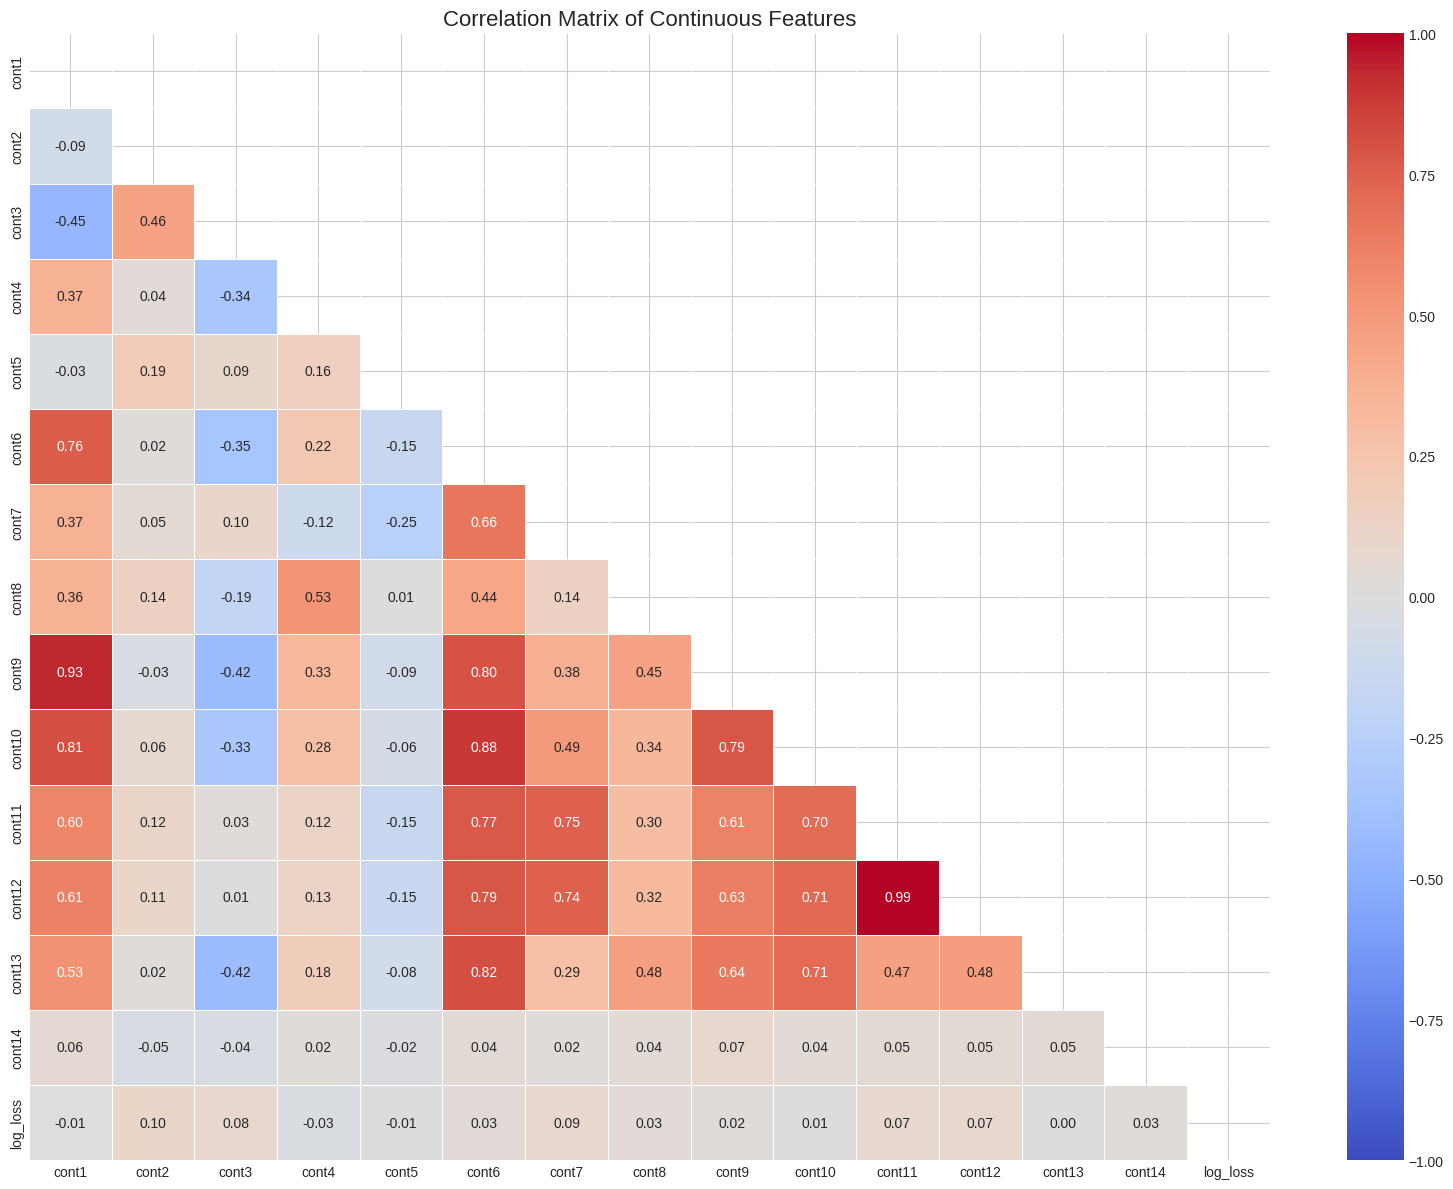

In [12]:
# Ïó∞ÏÜçÌòï Î≥ÄÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
plt.figure(figsize=(16, 12))
corr_matrix = train_df[cont_features + ['log_loss']].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f",
            linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix of Continuous Features", fontsize=16)
plt.tight_layout()
plt.show()

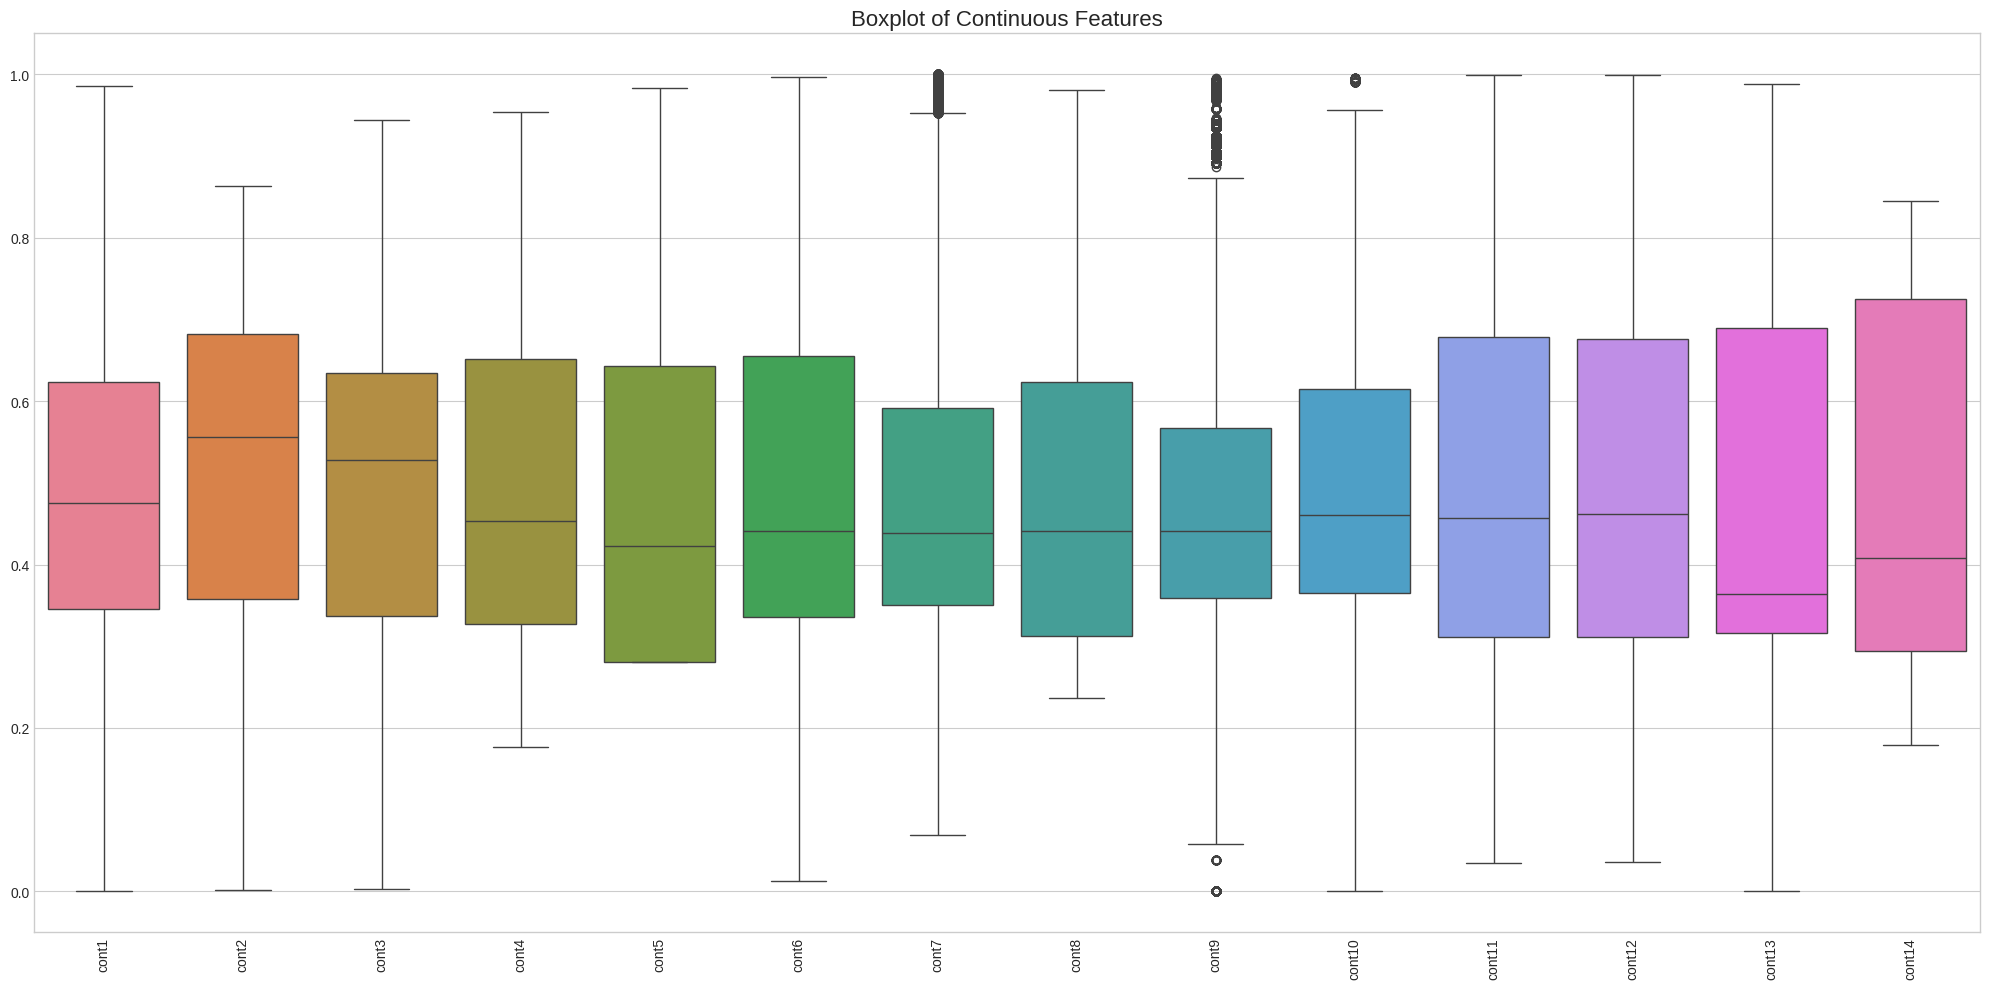

In [13]:
# Ïó∞ÏÜçÌòï Î≥ÄÏàòÏùò Ïù¥ÏÉÅÏπò ÌôïÏù∏
plt.figure(figsize=(20, 10))
sns.boxplot(data=train_df[cont_features])
plt.xticks(rotation=90)
plt.title("Boxplot of Continuous Features", fontsize=16)
plt.tight_layout()
plt.show()


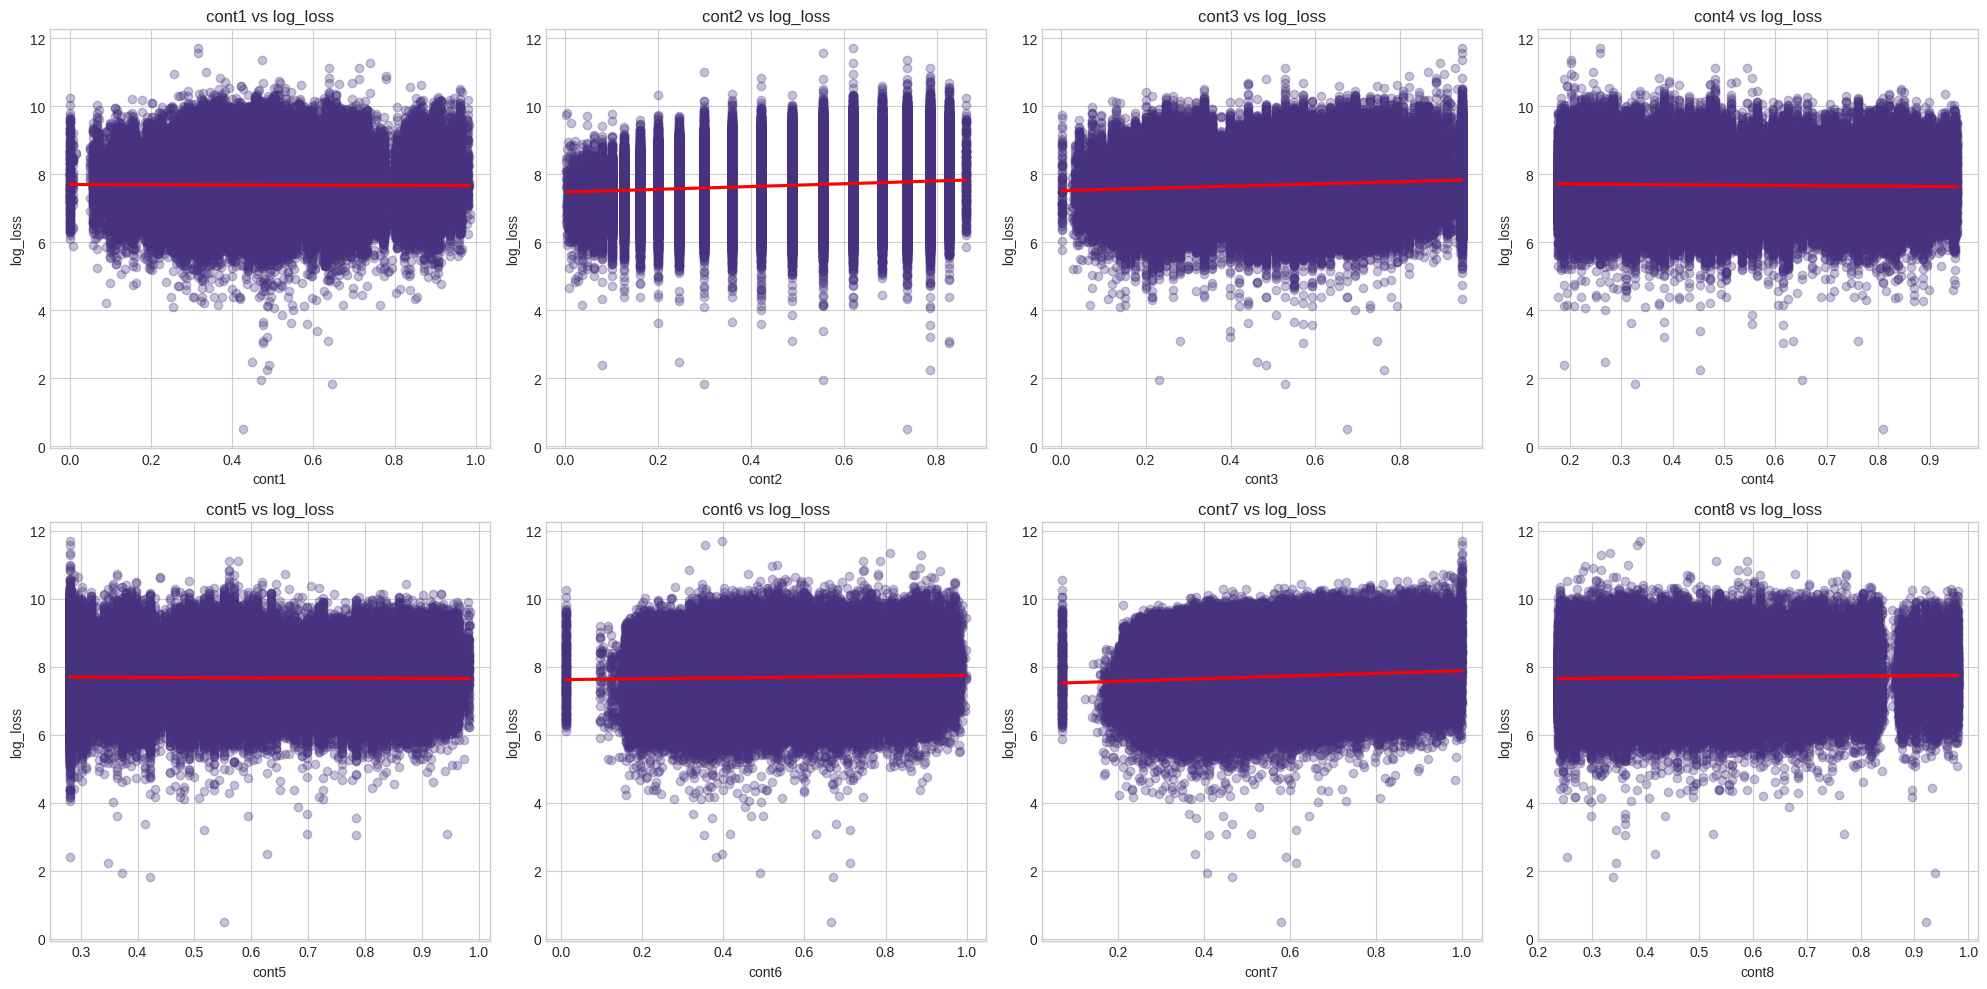

In [14]:
# ÌÉÄÍ≤ü Î≥ÄÏàòÏôÄ Ïó∞ÏÜçÌòï Î≥ÄÏàò Í∞ÑÏùò Í¥ÄÍ≥Ñ ÏãúÍ∞ÅÌôî (ÏÉÅÏúÑ 8Í∞úÎßå)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Ïó∞ÏÜçÌòï Î≥ÄÏàòÍ∞Ä 8Í∞úÎ≥¥Îã§ Ï†ÅÏùÑ Í≤ΩÏö∞ Ïò§Î•ò Î∞©ÏßÄ
num_plots = min(len(cont_features), 8)

for i in range(num_plots):
    col = cont_features[i]
    sns.regplot(x=train_df[col], y=train_df['log_loss'], ax=axes[i],
                scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    axes[i].set_title(f'{col} vs log_loss')

# ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎäî ÏÑúÎ∏åÌîåÎ°Ø Ïà®Í∏∞Í∏∞
for i in range(num_plots, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

## 3. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏

In [15]:
# ÌõàÎ†® Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
combined = pd.concat([train_df, test_df], axis=0, ignore_index=True)

# Î°úÍ∑∏ Î≥ÄÌôò (ÌÉÄÍ≤üÏö©)
combined['log_loss'] = np.log1p(combined['loss'])

# Î≥ÄÏàò Î∂ÑÎ¶¨
cat_onehot = [f'cat{i}' for i in range(1, 51)]  # ÏõêÌï´Ïù∏ÏΩîÎî©Ìï† Î≤îÏ£ºÌòï Î≥ÄÏàò
cat_target = [col for col in cat_features if col not in cat_onehot]  # ÌÉÄÍ≤ü Ïù∏ÏΩîÎî©Ìï† Î≤îÏ£ºÌòï Î≥ÄÏàò

# Î≤îÏ£ºÌòï Î≥ÄÏàòÍ∞Ä Î¨∏ÏûêÏó¥Ïù∏ÏßÄ ÌôïÏù∏ ÌõÑ Î≥ÄÌôò
for col in cat_onehot:
    if combined[col].dtype != 'object':
        combined[col] = combined[col].astype(str)

# Ïó∞ÏÜçÌòï Î≥ÄÏàò Ïä§ÏºÄÏùºÎßÅ
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
combined[cont_features] = scaler.fit_transform(combined[cont_features])

# ÏõêÌï´Ïù∏ÏΩîÎî© Ï†ÅÏö© (Ìïú Î≤àÎßå)
combined_onehot = pd.get_dummies(combined[cat_onehot], prefix=cat_onehot, dummy_na=False)
print(f"ÏõêÌï´ Ïù∏ÏΩîÎî© Ï†ÅÏö© ÌõÑ ÌäπÏÑ± Í∞úÏàò: {combined_onehot.shape[1]}")

ÏõêÌï´ Ïù∏ÏΩîÎî© Ï†ÅÏö© ÌõÑ ÌäπÏÑ± Í∞úÏàò: 100


In [17]:
'''
# 3. Ïó∞ÏÜçÌòï Î≥ÄÏàòÎßå Ïä§ÏºÄÏùºÎßÅ
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
combined[cont_features] = scaler.fit_transform(combined[cont_features])

# 4. Î≤îÏ£ºÌòï Î≥ÄÏàòÏóê ÎåÄÌï¥ ÏõêÌï´Ïù∏ÏΩîÎî© ÌôïÏã§Ìûà Ï†ÅÏö©
combined_onehot = pd.get_dummies(combined[cat_features])

# 5. Î™®Îç∏ ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ± (ÌäπÏÑ± ÌÉÄÏûÖ Íµ¨Î∂Ñ)
X_full = pd.concat([
    combined[cont_features],  # Ïä§ÏºÄÏùºÎßÅÎêú Ïó∞ÏÜçÌòï Î≥ÄÏàò
    combined_onehot,          # ÏõêÌï´Ïù∏ÏΩîÎî©Îêú Î≤îÏ£ºÌòï Î≥ÄÏàò
], axis=1)
'''

In [18]:
'''
# ÏõêÌï´ Ïù∏ÏΩîÎî© (cat1 ~ cat50)
print("ÏõêÌï´ Ïù∏ÏΩîÎî© Ï†ÅÏö©...")
# Î≤îÏ£ºÌòï Î≥ÄÏàòÍ∞Ä Î¨∏ÏûêÏó¥Ïù∏ÏßÄ ÌôïÏù∏ ÌõÑ Î≥ÄÌôò
for col in cat_onehot:
    if combined[col].dtype != 'object':
        combined[col] = combined[col].astype(str)

combined_onehot = pd.get_dummies(combined[cat_onehot], prefix=cat_onehot, dummy_na=False)
print(f"ÏõêÌï´ Ïù∏ÏΩîÎî© Ï†ÅÏö© ÌõÑ ÌäπÏÑ± Í∞úÏàò: {combined_onehot.shape[1]}")
'''


ÏõêÌï´ Ïù∏ÏΩîÎî© Ï†ÅÏö©...
ÏõêÌï´ Ïù∏ÏΩîÎî© Ï†ÅÏö© ÌõÑ ÌäπÏÑ± Í∞úÏàò: 100


In [16]:
# ÌÉÄÍ≤ü Ïù∏ÏΩîÎî© (cat51 Ïù¥ÏÉÅ)
print("ÌÉÄÍ≤ü Ïù∏ÏΩîÎî© Ï†ÅÏö©...")
train_part = combined.iloc[:len(train_df)]

target_encoded_cols = []
for col in cat_target:
    # Í∞Å Î≤îÏ£ºÎ≥Ñ ÌÉÄÍ≤üÏùò ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
    mapping = train_part.groupby(col)['log_loss'].mean().to_dict()
    global_mean = train_part['log_loss'].mean()
    # Îß§Ìïë Ï†ÅÏö© Î∞è Î™®Îì† Î≤îÏ£ºÏóê Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî Í∞íÏùÄ Í∏ÄÎ°úÎ≤å ÌèâÍ∑†ÏúºÎ°ú ÎåÄÏ≤¥
    combined[f'{col}_encoded'] = combined[col].map(mapping).fillna(global_mean)
    target_encoded_cols.append(f'{col}_encoded')


ÌÉÄÍ≤ü Ïù∏ÏΩîÎî© Ï†ÅÏö©...


In [17]:
# Ïó∞ÏÜçÌòï Î≥ÄÏàò Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ Î∞è Î≥ÄÌôò
print("Ïó∞ÏÜçÌòï Î≥ÄÏàò Ï†ÑÏ≤òÎ¶¨ Ï†ÅÏö©...")

# NaN Í∞í Ï≤¥ÌÅ¨ Î∞è Ï≤òÎ¶¨
for col in cont_features:
    if combined[col].isnull().sum() > 0:
        combined[col].fillna(combined[col].mean(), inplace=True)

# Ïù¥ÏÉÅÏπòÍ∞Ä ÎßéÏùÄ Ïó¥Îßå ÏÑ†ÌÉùÏ†ÅÏúºÎ°ú Winsorization Ï†ÅÏö©
for col in ['cont9', 'cont10', 'cont11', 'cont12', 'cont13']:
    # NaN Í∞íÏù¥ ÏóÜÎäîÏßÄ ÌôïÏù∏ ÌõÑ winsorize Ï†ÅÏö©
    if not np.isnan(combined[col]).any():
        combined[col] = np.array(winsorize(combined[col], limits=[0.01, 0.01]))

# ÏôúÎèÑÍ∞Ä ÎÜíÏùÄ Î≥ÄÏàòÏóê Î°úÍ∑∏ Î≥ÄÌôò Ï†ÅÏö©
skewed_cols = ['cont5', 'cont3', 'cont11']
for col in skewed_cols:
    # ÏùåÏàò Í∞íÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏
    min_val = combined[col].min()
    if min_val < 0:
        combined[col] = np.log1p(combined[col] - min_val + 1)  # ÏùåÏàò Í∞í Ï°∞Ï†ï
    else:
        combined[col] = np.log1p(combined[col])

# Ïó∞ÏÜçÌòï Î≥ÄÏàò Ï†ïÍ∑úÌôî (Ìïú Î≤àÎßå ÏàòÌñâ)
scaler = StandardScaler()
combined[cont_features] = scaler.fit_transform(combined[cont_features])



Ïó∞ÏÜçÌòï Î≥ÄÏàò Ï†ÑÏ≤òÎ¶¨ Ï†ÅÏö©...


In [18]:
# ÏµúÏ¢Ö ÏûÖÎ†•Í∞í ÏÉùÏÑ±
X_full = pd.concat([
    combined[cont_features],          # Ïä§ÏºÄÏùºÎßÅÎêú Ïó∞ÏÜçÌòï Î≥ÄÏàò
    combined_onehot,                  # ÏõêÌï´Ïù∏ÏΩîÎî©Îêú Î≤îÏ£ºÌòï Î≥ÄÏàò
    combined[target_encoded_cols]     # ÌÉÄÍ≤üÏù∏ÏΩîÎî©Îêú Î≤îÏ£ºÌòï Î≥ÄÏàò
], axis=1)

# Î™®Îì† Ïª¨ÎüºÏóê ÎåÄÌï¥ Í≤∞Ï∏°Ïπò ÌôïÏù∏
na_cols = X_full.columns[X_full.isna().any()].tolist()
if na_cols:
    print(f"Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ïª¨Îüº: {na_cols}")
    # Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
    for col in na_cols:
        X_full[col].fillna(X_full[col].mean() if X_full[col].dtype.kind in 'fc' else 0, inplace=True)

# Îã§Ïãú train/test Î∂ÑÎ¶¨ (Ïù∏Îç±Ïã± ÏàòÏ†ï)
X_train = X_full.iloc[:len(train_df)]
y_train = combined.iloc[:len(train_df)]['log_loss'].copy()

# NaN Í∞í ÌôïÏù∏ Î∞è Ï†úÍ±∞
if y_train.isnull().sum() > 0:
    print(f"ÌÉÄÍ≤ü Î≥ÄÏàòÏóê {y_train.isnull().sum()}Í∞úÏùò NaN Í∞íÏù¥ ÏûàÏäµÎãàÎã§. ÌèâÍ∑†Í∞íÏúºÎ°ú ÎåÄÏ≤¥Ìï©ÎãàÎã§.")
    y_train.fillna(y_train.mean(), inplace=True)

X_test = X_full.iloc[len(train_df):]

# Ï∞®Ïõê ÌôïÏù∏ (X_trainÍ≥º y_train Í∏∏Ïù¥Í∞Ä Í∞ôÏùÄÏßÄ ÌôïÏù∏)
print(f"X_train Ï∞®Ïõê: {X_train.shape}")
print(f"y_train Ï∞®Ïõê: {y_train.shape}")
print(f"X_test Ï∞®Ïõê: {X_test.shape}")

X_train Ï∞®Ïõê: (188318, 180)
y_train Ï∞®Ïõê: (188318,)
X_test Ï∞®Ïõê: (125546, 180)


## 4. Î™®Îç∏ ÏÑ†ÌÉù Î∞è ÏÑ±Îä• ÌèâÍ∞Ä


In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import lightgbm
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


In [20]:
# Í≤ÄÏ¶ùÏö©ÏúºÎ°ú train ÏÑ∏Ìä∏ Î∂ÑÌï†
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [21]:
# Ïó¨Îü¨ Î™®Îç∏ ÌÖåÏä§Ìä∏ (ÏùºÎ∂Ä ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ï)
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0, random_state=42),
    "Lasso": Lasso(alpha=0.1, random_state=42, max_iter=1000),  # max_iter Ï∂îÍ∞Ä
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),  # n_jobs Ï∂îÍ∞Ä
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1),  # n_jobs Ï∂îÍ∞Ä
    "LightGBM": LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)  # n_jobs Ï∂îÍ∞Ä
}

# Í≤∞Í≥º Ï†ÄÏû•Ïö© ÎîïÏÖîÎÑàÎ¶¨
results = {}

# Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä
for name, model in models.items():
    print(f"{name} Î™®Îç∏ ÌïôÏäµ Ï§ë...")
    model.fit(X_tr, y_tr)

    # ÏòàÏ∏° (Î°úÍ∑∏ Ïä§ÏºÄÏùº)
    pred_log = model.predict(X_val)

    # Î°úÍ∑∏ Ïä§ÏºÄÏùº ÌèâÍ∞Ä ÏßÄÌëú
    mae_log = mean_absolute_error(y_val, pred_log)
    rmse_log = np.sqrt(mean_squared_error(y_val, pred_log))
    r2_log = r2_score(y_val, pred_log)

    # ÏõêÎûò Ïä§ÏºÄÏùºÎ°ú Î≥ÄÌôò ÌõÑ ÌèâÍ∞Ä ÏßÄÌëú
    pred_loss = np.expm1(pred_log)
    true_loss = np.expm1(y_val)
    mae_real = mean_absolute_error(true_loss, pred_loss)

    results[name] = {
        "log_mae": round(mae_log, 4),
        "log_rmse": round(rmse_log, 4),
        "log_r2": round(r2_log, 4),
        "real_mae": round(mae_real, 2)
    }

# Í≤∞Í≥º Ï∂úÎ†•
print("\nÎ™®Îç∏ ÏÑ±Îä• ÎπÑÍµê:")
for model, res in results.items():
    print(f"{model:15s} | Log MAE: {res['log_mae']:.4f} | Log RMSE: {res['log_rmse']:.4f} | R¬≤: {res['log_r2']:.4f} | Real MAE: {res['real_mae']:.2f}")


Linear Î™®Îç∏ ÌïôÏäµ Ï§ë...
Ridge Î™®Îç∏ ÌïôÏäµ Ï§ë...
Lasso Î™®Îç∏ ÌïôÏäµ Ï§ë...
RandomForest Î™®Îç∏ ÌïôÏäµ Ï§ë...
GradientBoosting Î™®Îç∏ ÌïôÏäµ Ï§ë...
XGBoost Î™®Îç∏ ÌïôÏäµ Ï§ë...
LightGBM Î™®Îç∏ ÌïôÏäµ Ï§ë...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.148731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3712
[LightGBM] [Info] Number of data points in the train set: 150654, number of used features: 180
[LightGBM] [Info] Start training from score 7.685676

Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê:
Linear          | Log MAE: 0.4435 | Log RMSE: 0.5652 | R¬≤: 0.5104 | Real MAE: 1255.94
Ridge           | Log MAE: 0.4435 | Log RMSE: 0.5651 | R¬≤: 0.5105 | Real MAE: 1255.91
Lasso           | Log MAE: 0.6081 | Log RMSE: 0.7485 | R¬≤: 0.1411 | Real MAE: 1681.35
RandomForest    | Log MAE: 0.4344 | Log RMSE: 0.5584 | R¬≤: 0.5220 | Real MAE: 1197.49
Gradient

In [22]:
# Í∞ÄÏû• Ïö∞ÏàòÌïú Î™®Îç∏Ïóê ÎåÄÌïú K-Fold ÍµêÏ∞® Í≤ÄÏ¶ù
best_model_name = min(results, key=lambda x: results[x]['log_mae'])
best_model = models[best_model_name]  # ÌÅ¥ÎûòÏä§ ÎåÄÏã† Ïù∏Ïä§ÌÑ¥Ïä§ ÏÇ¨Ïö©

print(f"\nÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏: {best_model_name}")

# 5-Fold ÍµêÏ∞® Í≤ÄÏ¶ù
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []

for train_idx, val_idx in kf.split(X_train):
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Î™®Îç∏ Î≥µÏ†ú Î∞è ÌïôÏäµ
    from sklearn.base import clone
    fold_model = clone(best_model)
    fold_model.fit(X_fold_train, y_fold_train)

    # ÏòàÏ∏° Î∞è MAE Í≥ÑÏÇ∞
    y_pred = fold_model.predict(X_fold_val)
    mae = mean_absolute_error(y_fold_val, y_pred)
    mae_scores.append(mae)

print("5-Fold ÍµêÏ∞® Í≤ÄÏ¶ù MAE Ï†êÏàò:")
print(mae_scores)
print(f"ÌèâÍ∑† MAE: {np.mean(mae_scores):.4f}")
print(f"ÌëúÏ§ÄÌé∏Ï∞®: {np.std(mae_scores):.4f}")



ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏: LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.140807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3712
[LightGBM] [Info] Number of data points in the train set: 150654, number of used features: 180
[LightGBM] [Info] Start training from score 7.685676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.140610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3724
[LightGBM] [Info] Number of data points in the train set: 150654, number of used features: 180
[LightGBM] [Info] Start training from score 7.685940
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.135945 seconds.
You can set `force_row_wise=true` to remove the 

In [30]:
!pip install optuna

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 383.6/383.6 kB 18.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 231.9/231.9 kB 15.5 MB/s eta 0:00:00


In [33]:
import optuna
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")


def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 30)
    }

    model = LGBMRegressor(**params, random_state=42, n_jobs=-1, verbose = -1)

    # ÍµêÏ∞® Í≤ÄÏ¶ù Ï†êÏàò (MAE, ÎÇÆÏùÑÏàòÎ°ù Ï¢ãÏùå)
    score = cross_val_score(
        model,
        X_train,
        y_train,
        scoring='neg_mean_absolute_error',
        cv=3
    )
    return -score.mean()

# Ïä§ÌÑ∞Îîî ÏÉùÏÑ± Î∞è Ïã§Ìñâ
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)  # 30Î≤à Ïã§Ìóò (ÌïÑÏöî Ïãú ÎäòÎ†§ÎèÑ OK)

# Í≤∞Í≥º Ï∂úÎ†•
print("\n‚úÖ ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞:")
for param, val in study.best_trial.params.items():
    print(f"{param}: {val}")
print(f"‚úÖ Best CV MAE: {study.best_value:.4f}")

[I 2025-04-05 03:54:16,498] A new study created in memory with name: no-name-8d0a6092-a3f5-410d-8837-eb6ec173ced7
[I 2025-04-05 03:54:35,990] Trial 0 finished with value: 0.43669686204427377 and parameters: {'n_estimators': 126, 'learning_rate': 0.07513999558694481, 'max_depth': 3, 'num_leaves': 31, 'subsample': 0.9973875574996665, 'colsample_bytree': 0.8186964104366858, 'min_child_samples': 14}. Best is trial 0 with value: 0.43669686204427377.
[I 2025-04-05 03:55:16,658] Trial 1 finished with value: 0.4215744473220209 and parameters: {'n_estimators': 366, 'learning_rate': 0.19843003627846653, 'max_depth': 9, 'num_leaves': 68, 'subsample': 0.9752982837876312, 'colsample_bytree': 0.751390085276041, 'min_child_samples': 27}. Best is trial 1 with value: 0.4215744473220209.
[I 2025-04-05 03:55:37,644] Trial 2 finished with value: 0.41959866720729405 and parameters: {'n_estimators': 114, 'learning_rate': 0.09847014983149659, 'max_depth': 10, 'num_leaves': 27, 'subsample': 0.737825347890861,


‚úÖ ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞:
n_estimators: 786
learning_rate: 0.04937619698271257
max_depth: 10
num_leaves: 68
subsample: 0.9081677695782933
colsample_bytree: 0.7063405594543548
min_child_samples: 30
‚úÖ Best CV MAE: 0.4147


In [35]:
from lightgbm import LGBMRegressor
import numpy as np

#  1. ÏÉòÌîå Í∞ÄÏ§ëÏπò ÏÉùÏÑ± (Î°úÍ∑∏ ÏÜêÌï¥Ïï° ‚Üí ÏõêÎûò ÏÜêÌï¥Ïï° Î≥µÏõê Í∏∞Ï§Ä)
sample_weights = np.expm1(y_train)
sample_weights = sample_weights / sample_weights.mean()  # Ï†ïÍ∑úÌôî (ÏÑ†ÌÉù)

# 2. ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ ÏÉùÏÑ±
final_model = LGBMRegressor(
    n_estimators=786,
    learning_rate=0.04937619698271257,
    max_depth=10,
    num_leaves=68,
    subsample=0.9081677695782933,
    colsample_bytree=0.7063405594543548,
    min_child_samples=30,
    random_state=42,
    n_jobs=-1
)

#  3. Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ
print("üì¶ ÏµúÏ¢Ö LightGBM Î™®Îç∏ ÌïôÏäµ Ï§ë (ÏÉòÌîå Í∞ÄÏ§ëÏπò Ìè¨Ìï®)...")
final_model.fit(X_train, y_train, sample_weight=sample_weights)

# 4. ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° (Î°úÍ∑∏ Ïä§ÏºÄÏùº ‚Üí ÏõêÎûò ÏÜêÌï¥Ïï°ÏúºÎ°ú Î≥µÏõê)
print("üìà ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÏòàÏ∏° Ï§ë...")
log_predictions = final_model.predict(X_test)
final_predictions = np.expm1(log_predictions)  # Î°úÍ∑∏ Î≥µÏõê

print(f"‚úÖ ÏòàÏ∏° ÏôÑÎ£å! Ï¥ù {len(final_predictions):,}Í±¥")

üì¶ ÏµúÏ¢Ö LightGBM Î™®Îç∏ ÌïôÏäµ Ï§ë (ÏÉòÌîå Í∞ÄÏ§ëÏπò Ìè¨Ìï®)...
üìà ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÏòàÏ∏° Ï§ë...
‚úÖ ÏòàÏ∏° ÏôÑÎ£å! Ï¥ù 125,546Í±¥


In [37]:
import joblib

joblib.dump(final_model, 'final_model_lgbm.pkl')
print(" ÏµúÏ¢Ö Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å: final_model_lgbm.pkl")

 ÏµúÏ¢Ö Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å: final_model_lgbm.pkl


In [38]:
with open("log.txt", "w") as f:
    f.write(" ÏµúÏ¢Ö LightGBM ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞\n")
    f.write("n_estimators: 786\n")
    f.write("learning_rate: 0.04937619698271257\n")
    f.write("max_depth: 10\n")
    f.write("num_leaves: 68\n")
    f.write("subsample: 0.9081677695782933\n")
    f.write("colsample_bytree: 0.7063405594543548\n")
    f.write("min_child_samples: 30\n")
    f.write("\nBest CV MAE: 0.4147\n")
    f.write("ÏµúÏ¢Ö ÏòàÏ∏° Ïàò: %d\n" % len(final_predictions))
print(" Î°úÍ∑∏ Ï†ÄÏû• ÏôÑÎ£å: log.txt")

 Î°úÍ∑∏ Ï†ÄÏû• ÏôÑÎ£å: log.txt


In [40]:
submission = pd.DataFrame({
    'id': range(len(final_predictions)),
    'predicted_loss': final_predictions
})
submission.to_csv('submission.csv', index=False)
print(" ÏòàÏ∏° Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å: submission.csv")

 ÏòàÏ∏° Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å: submission.csv


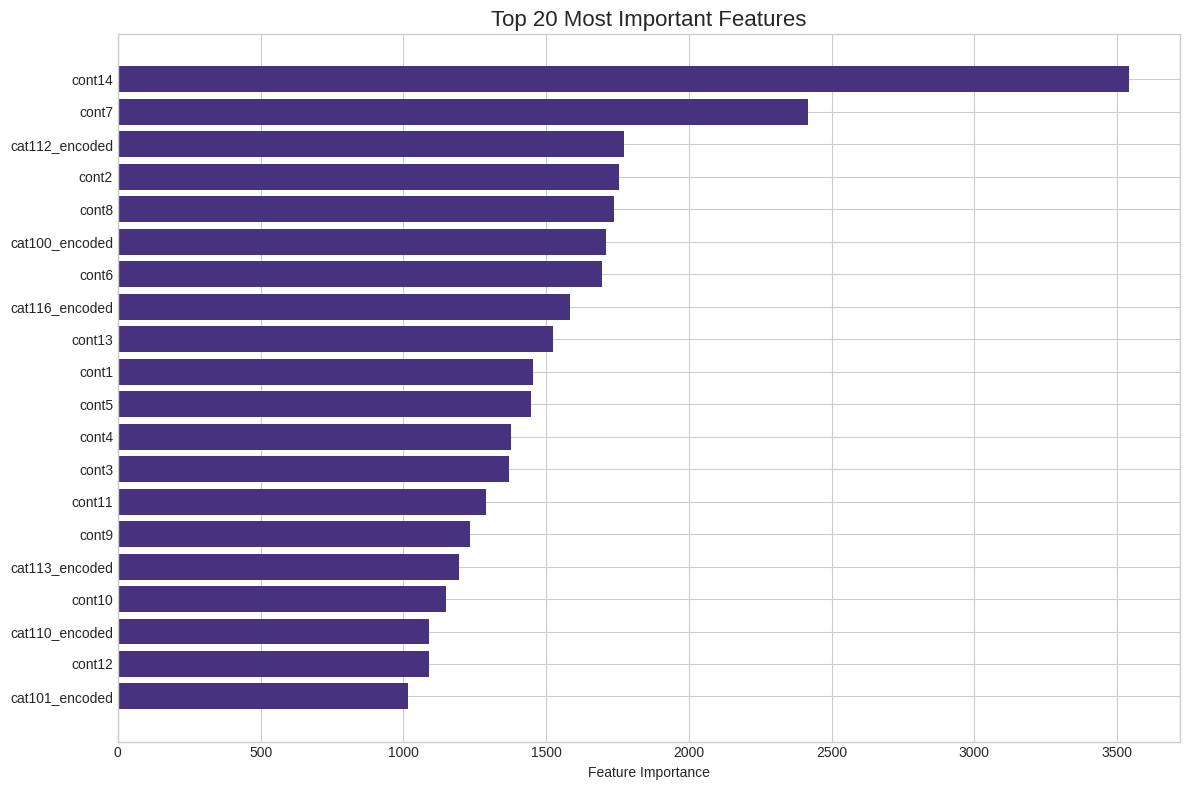

In [41]:
# ÌäπÏÑ± Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
feature_importance = final_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

# ÏÉÅÏúÑ 20Í∞ú ÌäπÏÑ±Îßå ÏãúÍ∞ÅÌôî
top_n = 20
top_features = X_full.columns[sorted_idx[-top_n:]]
top_importances = feature_importance[sorted_idx[-top_n:]]

plt.barh(range(top_n), top_importances)
plt.yticks(range(top_n), top_features)
plt.xlabel('Feature Importance')
plt.title('Top 20 Most Important Features', fontsize=16)
plt.tight_layout()
plt.show()


SHAP Í∞íÏùÑ Ïù¥Ïö©Ìïú Î™®Îç∏ Ìï¥ÏÑù Ï§ë...


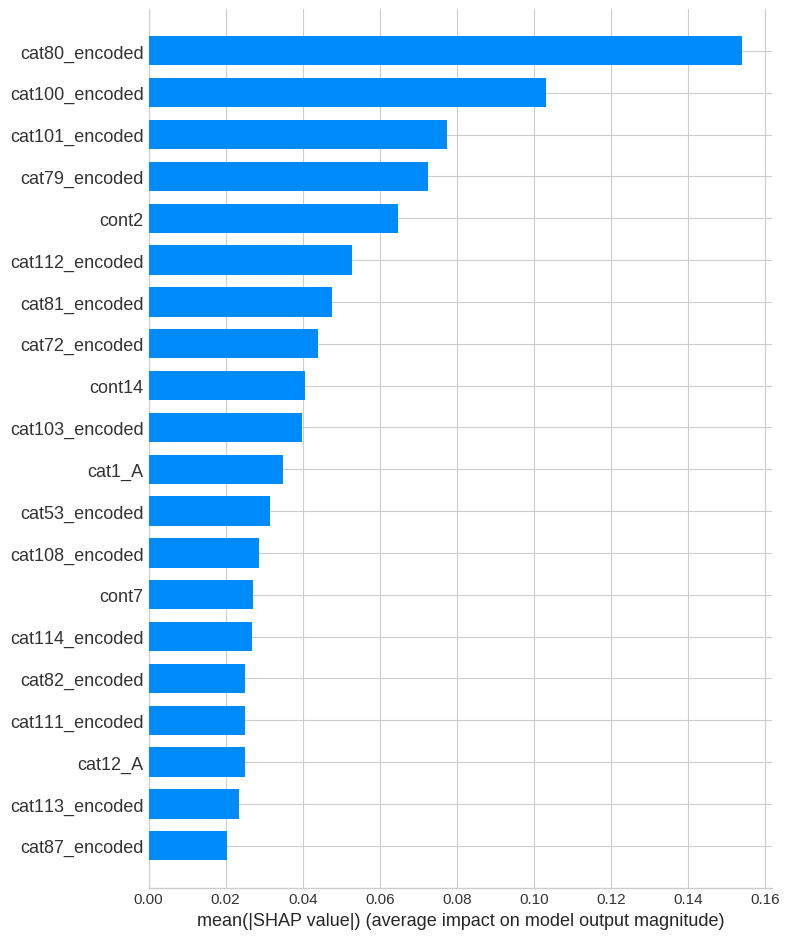

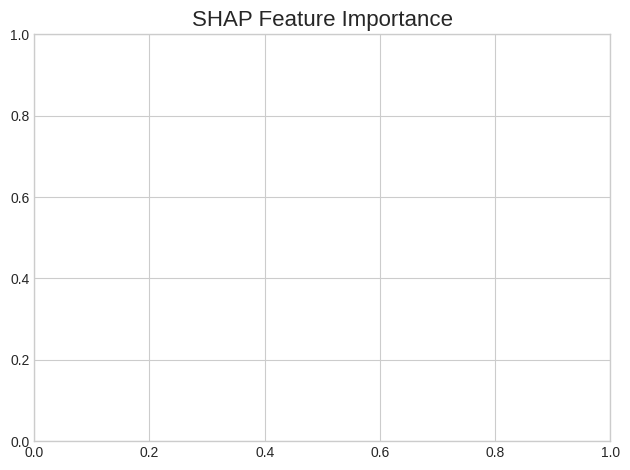

<Figure size 1000x600 with 0 Axes>

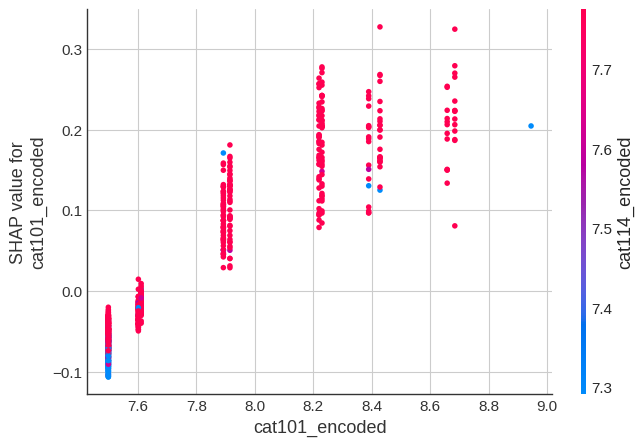

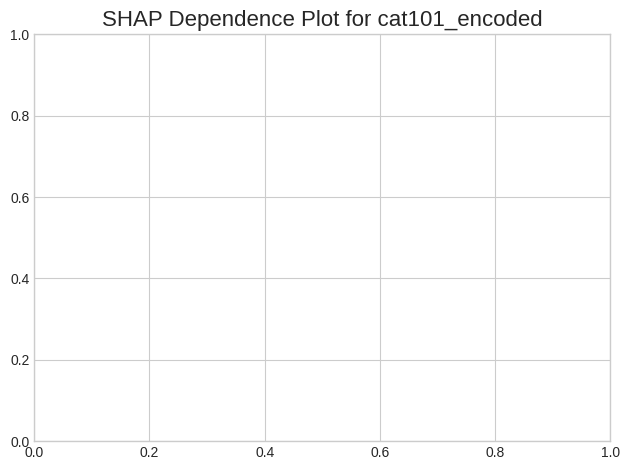

<Figure size 1000x600 with 0 Axes>

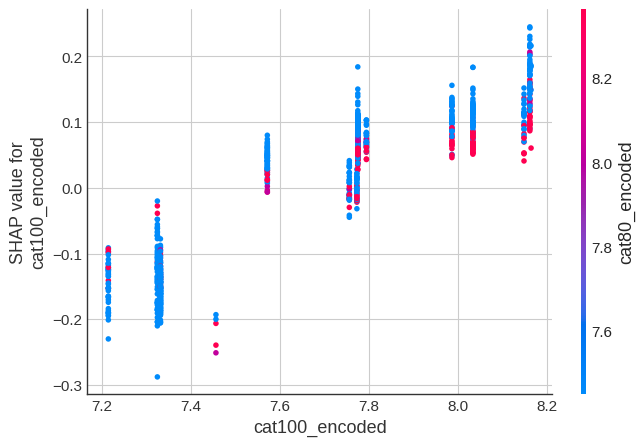

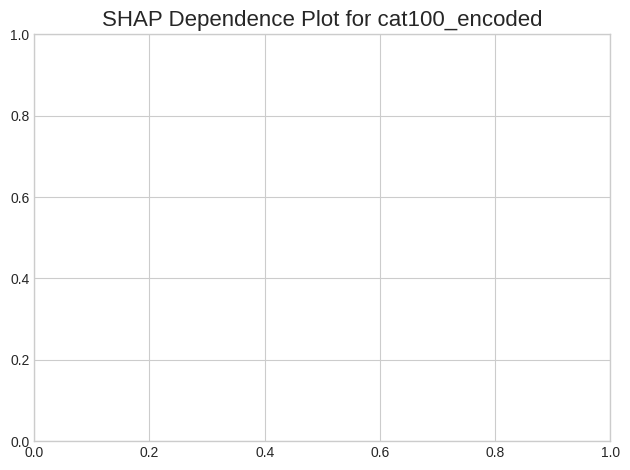

<Figure size 1000x600 with 0 Axes>

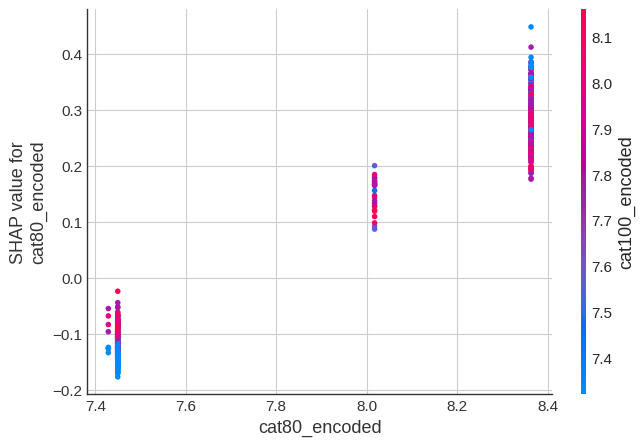

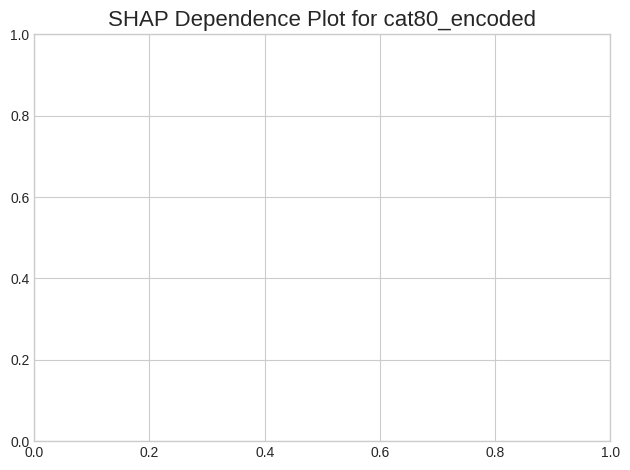

In [42]:
# SHAP Í∞íÏùÑ Ïù¥Ïö©Ìïú Ïã¨Ï∏µ Î∂ÑÏÑù (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
try:
    import shap
    print("\nSHAP Í∞íÏùÑ Ïù¥Ïö©Ìïú Î™®Îç∏ Ìï¥ÏÑù Ï§ë...")

    # SHAP Í∞í Í≥ÑÏÇ∞ (ÏÉòÌîå 1000Í∞úÎ°ú Ï†úÌïúÌïòÏó¨ Í≥ÑÏÇ∞ ÏÜçÎèÑ Ìñ•ÏÉÅ)
    explainer = shap.TreeExplainer(final_model)
    shap_sample = X_full.sample(min(1000, len(X_full)), random_state=42)
    shap_values = explainer.shap_values(shap_sample)

    # SHAP ÏöîÏïΩ ÌîåÎ°Ø
    plt.figure(figsize=(10, 12))
    shap.summary_plot(shap_values, shap_sample, plot_type="bar")
    plt.title("SHAP Feature Importance", fontsize=16)
    plt.tight_layout()
    plt.show()

    # SHAP ÏùòÏ°¥ÏÑ± ÌîåÎ°Ø (ÏÉÅÏúÑ 3Í∞ú ÌäπÏÑ±Ïóê ÎåÄÌï¥)
    top_3_features = X_full.columns[np.argsort(np.abs(shap_values).mean(0))[-3:]]
    for feature in top_3_features:
        plt.figure(figsize=(10, 6))
        shap.dependence_plot(feature, shap_values, shap_sample)
        plt.title(f"SHAP Dependence Plot for {feature}", fontsize=16)
        plt.tight_layout()
        plt.show()

except ImportError:
    print("SHAP ÎùºÏù¥Î∏åÎü¨Î¶¨Í∞Ä ÏÑ§ÏπòÎêòÏßÄ ÏïäÏïÑ Í±¥ÎÑàÎúÅÎãàÎã§. Îçî ÏûêÏÑ∏Ìïú Ìï¥ÏÑùÏùÑ ÏõêÌïòÏãúÎ©¥ 'pip install shap'Î•º Ïã§ÌñâÌïòÏÑ∏Ïöî.")


In [43]:
# ÏòàÏ∏° Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
submission = pd.DataFrame({
    'id': X_test.index,  # ÎòêÎäî Î≥ÑÎèÑÏùò id Ïª¨ÎüºÏù¥ ÏûàÎã§Î©¥ Í∑∏Í≤ÉÏùÑ ÏÇ¨Ïö©
    'predicted_loss': final_predictions
})

# CSV ÌååÏùºÎ°ú Ï†ÄÏû•
submission.to_csv('allstate_loss_prediction.csv', index=False)
print("üìÑ ÏòàÏ∏° Í≤∞Í≥ºÍ∞Ä 'allstate_loss_prediction.csv'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÏòàÏ∏°Í∞í Ï∂îÍ∞ÄÌïòÏó¨ Î≥¥ÌóòÎ£å ÏÇ∞Ï∂úÏóê ÏÇ¨Ïö©
X_test_with_pred = X_test.copy()
X_test_with_pred['predicted_loss'] = final_predictions

# Î™®Îç∏ Ï†ÄÏû• (ÎÇòÏ§ëÏóê Îã§Ïãú ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎèÑÎ°ù)
import joblib
joblib.dump(final_model, 'final_weighted_xgboost_model.pkl')
print("üì¶ ÏµúÏ¢Ö Î™®Îç∏Ïù¥ 'final_weighted_xgboost_model.pkl'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

print("\n‚úÖ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÏòàÏ∏° ÏôÑÎ£å, Î≥¥ÌóòÎ£å ÏÇ∞Ï∂ú Î™®ÎìàÎ°ú Îç∞Ïù¥ÌÑ∞ Ï†ÑÎã¨ Ï§ÄÎπÑ")

üìÑ ÏòàÏ∏° Í≤∞Í≥ºÍ∞Ä 'allstate_loss_prediction.csv'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.
üì¶ ÏµúÏ¢Ö Î™®Îç∏Ïù¥ 'final_weighted_xgboost_model.pkl'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.

‚úÖ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÏòàÏ∏° ÏôÑÎ£å, Î≥¥ÌóòÎ£å ÏÇ∞Ï∂ú Î™®ÎìàÎ°ú Îç∞Ïù¥ÌÑ∞ Ï†ÑÎã¨ Ï§ÄÎπÑ


In [45]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° (Î°úÍ∑∏ Ïä§ÏºÄÏùº)
test_pred_log = final_model.predict(X_test)

# ÏõêÎûò Ïä§ÏºÄÏùºÎ°ú Î≥ÄÌôò
test_pred_loss = np.expm1(test_pred_log)

## 5.Î≥¥Ìóò Î™®Îç∏ÎßÅ Ïã¨Ï∏µ Î∂ÑÏÑù Î∞è Ïã§Ìóò

### 1. Í≥†Í∏â ÌäπÏÑ± ÏóîÏßÄÎãàÏñ¥ÎßÅ Ïã§Ìóò

#### 1.1 ÏÉÅÌò∏ÏûëÏö© ÌäπÏÑ±(Interaction Features) Ïã§Ìóò

In [79]:
# ÏÉÅÏúÑ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÑ Ïó∞ÏÜçÌòï Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÌò∏ÏûëÏö© ÌäπÏÑ± ÏÉùÏÑ±
top_cont_features = ['cont1', 'cont6', 'cont9', 'cont10', 'cont11', 'cont12']  # ÏòàÏãú - Ïã§Ï†ú Î∂ÑÏÑù Í≤∞Í≥ºÏóê Îî∞Îùº ÏàòÏ†ï

# ÏÉÅÌò∏ÏûëÏö© ÌäπÏÑ± ÏÉùÏÑ±
for i in range(len(top_cont_features)):
    for j in range(i+1, len(top_cont_features)):
        feat_i = top_cont_features[i]
        feat_j = top_cont_features[j]
        interaction_name = f"{feat_i}_x_{feat_j}"
        X_train[interaction_name] = X_train[feat_i] * X_train[feat_j]
        X_val[interaction_name] = X_val[feat_i] * X_val[feat_j]
        X_test[interaction_name] = X_test[feat_i] * X_test[feat_j]

print(f"ÏÉÅÌò∏ÏûëÏö© ÌäπÏÑ± Ï∂îÍ∞Ä ÌõÑ ÌäπÏÑ± Ïàò: {X_train.shape[1]}")


ÏÉÅÌò∏ÏûëÏö© ÌäπÏÑ± Ï∂îÍ∞Ä ÌõÑ ÌäπÏÑ± Ïàò: 197


In [80]:
# Í∏∞Ï§Ä Î™®Îç∏Î°ú LightGBM ÏÇ¨Ïö©
base_model = LGBMRegressor(random_state=42)
base_model.fit(X_train, y_train)

base_pred = base_model.predict(X_val)
base_mae = mean_absolute_error(y_val, base_pred)

print(f"üìå LightGBM Í∏∞Ï§Ä Î™®Îç∏ MAE: {base_mae:.4f}")

üìå LightGBM Í∏∞Ï§Ä Î™®Îç∏ MAE: 0.4101


In [81]:
# ÏÉÅÌò∏ÏûëÏö© ÌäπÏÑ±ÏùÑ Ìè¨Ìï®Ìïú Î™®Îç∏ ÌèâÍ∞Ä

interaction_model = LGBMRegressor(n_estimators=50, random_state=42)
interaction_model.fit(X_train, y_train)
interaction_pred = interaction_model.predict(X_val)
interaction_mae = mean_absolute_error(y_val, interaction_pred)

print(f"ÏÉÅÌò∏ÏûëÏö© ÌäπÏÑ± Ìè¨Ìï® Î™®Îç∏ MAE: {interaction_mae:.4f}")
print(f"Í∏∞Ï§Ä Î™®Îç∏ MAEÏôÄÏùò Ï∞®Ïù¥: {(interaction_mae - base_mae) / base_mae * 100:.2f}%")


ÏÉÅÌò∏ÏûëÏö© ÌäπÏÑ± Ìè¨Ìï® Î™®Îç∏ MAE: 0.4211
Í∏∞Ï§Ä Î™®Îç∏ MAEÏôÄÏùò Ï∞®Ïù¥: 2.70%


#### 1.2 Îã§Ìï≠Ïãù ÌäπÏÑ±(Polynomial Features) Ïã§Ìóò

In [82]:
def get_important_cont_features(X, y, top_n=5):
    # Ïó∞ÏÜçÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏ Ï∂îÏ†ï (cont1 ~ cont14)
    cont_features = [col for col in X.columns if col.startswith("cont")]

    # Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎßÅ (Îπ†Î•∏ ÌõàÎ†®Ïö©)
    X_sample, _, y_sample, _ = train_test_split(X[cont_features], y, test_size=0.8, random_state=42)

    # Í∞ÑÎã®Ìïú LGBM Î™®Îç∏Î°ú ÌïôÏäµ
    temp_model = LGBMRegressor(n_estimators=50, random_state=42)
    temp_model.fit(X_sample, y_sample)

    # Ï§ëÏöîÎèÑ Ï∂îÏ∂ú Î∞è Ï†ïÎ†¨
    importance_df = pd.DataFrame({
        'feature': cont_features,
        'importance': temp_model.feature_importances_
    }).sort_values(by='importance', ascending=False)

    top_features = importance_df.head(top_n)['feature'].tolist()
    return top_features

In [83]:
important_cont_features = get_important_cont_features(X_train, y_train, top_n=5)
print("Ï§ëÏöî Ïó∞ÏÜçÌòï Î≥ÄÏàò:", important_cont_features)

Ï§ëÏöî Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['cont14', 'cont7', 'cont2', 'cont4', 'cont13']


In [84]:
# Ï§ëÏöî Ïó∞ÏÜçÌòï Î≥ÄÏàòÏóê ÎåÄÌï¥ 2Ï∞® Îã§Ìï≠Ïãù ÌäπÏÑ± ÏÉùÏÑ±
important_features = ['cont2', 'cont7', 'cont14']

# Îã§Ìï≠Ïãù ÌäπÏÑ± ÏÉùÏÑ±Í∏∞
poly = PolynomialFeatures(degree=2, include_bias=False)

# ÏÑ†ÌÉùÎêú ÌäπÏÑ±Ïóê ÎåÄÌï¥ÏÑúÎßå Îã§Ìï≠Ïãù ÌäπÏÑ± Ï†ÅÏö©
X_train_selected = X_train[important_features].copy()
X_val_selected = X_val[important_features].copy()
X_test_selected = X_test[important_features].copy()

# Îã§Ìï≠Ïãù ÏÉùÏÑ±
poly_features_train = poly.fit_transform(X_train_selected)
poly_features_val = poly.transform(X_val_selected)
poly_features_test = poly.transform(X_test_selected)

# Ï†ïÌôïÌïú Ïù¥Î¶Ñ ÏûêÎèô Ï∂îÏ∂ú
poly_feature_names = poly.get_feature_names_out(important_features)[len(important_features):]

# DataFrame Î≥ÄÌôò
poly_df_train = pd.DataFrame(poly_features_train[:, len(important_features):], columns=poly_feature_names, index=X_train.index)
poly_df_val = pd.DataFrame(poly_features_val[:, len(important_features):], columns=poly_feature_names, index=X_val.index)
poly_df_test = pd.DataFrame(poly_features_test[:, len(important_features):], columns=poly_feature_names, index=X_test.index)

# ÏõêÎûò ÌäπÏÑ±Í≥º Í≤∞Ìï©
X_train_poly = pd.concat([X_train, poly_df_train], axis=1)
X_val_poly = pd.concat([X_val, poly_df_val], axis=1)
X_test_poly = pd.concat([X_test, poly_df_test], axis=1)

print(f"Îã§Ìï≠Ïãù ÌäπÏÑ± Ï∂îÍ∞Ä ÌõÑ ÌäπÏÑ± Ïàò: {X_train_poly.shape[1]}")

# Îã§Ìï≠Ïãù ÌäπÏÑ±ÏùÑ Ìè¨Ìï®Ìïú Î™®Îç∏ ÌèâÍ∞Ä
poly_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
poly_model.fit(X_train_poly, y_train)
poly_pred = poly_model.predict(X_val_poly)
poly_mae = mean_absolute_error(y_val, poly_pred)

print(f"Îã§Ìï≠Ïãù ÌäπÏÑ± Ìè¨Ìï® Î™®Îç∏ MAE: {poly_mae:.4f}")
print(f"Í∏∞Ï§Ä Î™®Îç∏ MAEÏôÄÏùò Ï∞®Ïù¥: {(poly_mae - base_mae) / base_mae * 100:.2f}%")


Îã§Ìï≠Ïãù ÌäπÏÑ± Ï∂îÍ∞Ä ÌõÑ ÌäπÏÑ± Ïàò: 203
Îã§Ìï≠Ïãù ÌäπÏÑ± Ìè¨Ìï® Î™®Îç∏ MAE: 0.4318
Í∏∞Ï§Ä Î™®Îç∏ MAEÏôÄÏùò Ï∞®Ïù¥: 5.31%


#### 1.3 ÌäπÏÑ± Î≥ÄÌôò Î∞è Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ ÏòÅÌñ• Î∂ÑÏÑù

yeo-johnson Î≥ÄÌôò MAE: 0.4304
quantile Î≥ÄÌôò MAE: 0.4300
robust Î≥ÄÌôò MAE: 0.4304


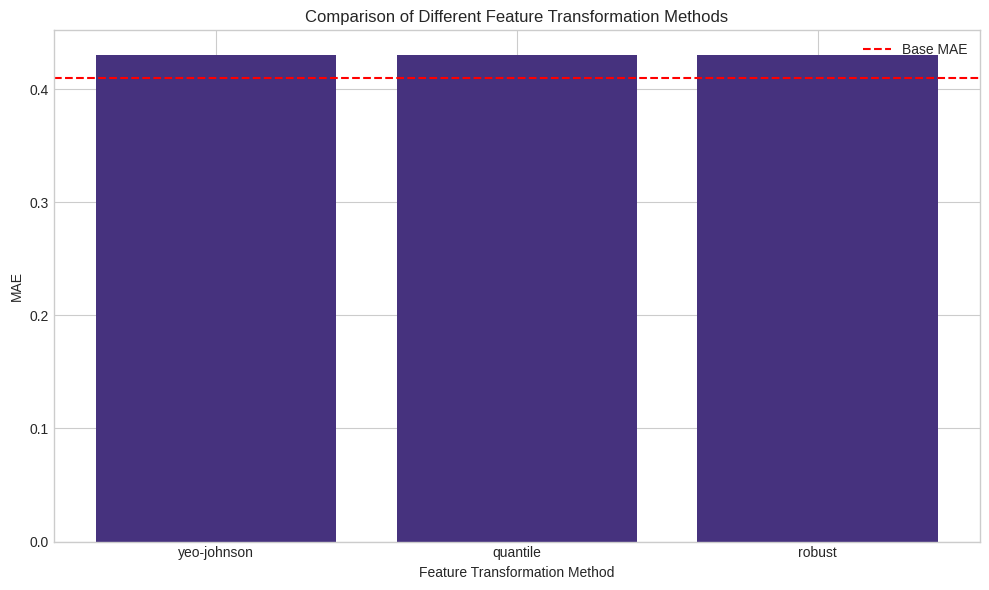

In [85]:
# Îã§ÏñëÌïú Î≥ÄÌôò Î∞©Î≤ïÏùò ÏòÅÌñ• Ïã§Ìóò
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, RobustScaler

# Î≥ÄÌôòÍ∏∞ Î™©Î°ù
transformers = {
    'yeo-johnson': PowerTransformer(method='yeo-johnson'),
    'quantile': QuantileTransformer(output_distribution='normal'),
    'robust': RobustScaler(),
}

# Î™®Îç∏ ÏÑ±Îä• Í≤∞Í≥º Ï†ÄÏû•
transform_results = {}

# Í∞Å Î≥ÄÌôò Î∞©Î≤ïÏúºÎ°ú Ïã§Ìóò
for name, transformer in transformers.items():
    # Ïó∞ÏÜçÌòï ÌäπÏÑ±ÏóêÎßå Î≥ÄÌôò Ï†ÅÏö©
    X_train_transformed = X_train.copy()
    X_val_transformed = X_val.copy()

    X_train_transformed[cont_features] = transformer.fit_transform(X_train[cont_features])
    X_val_transformed[cont_features] = transformer.transform(X_val[cont_features])

    # Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÌïôÏäµ
    transform_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    transform_model.fit(X_train_transformed, y_train)
    transform_pred = transform_model.predict(X_val_transformed)
    transform_mae = mean_absolute_error(y_val, transform_pred)

    transform_results[name] = transform_mae
    print(f"{name} Î≥ÄÌôò MAE: {transform_mae:.4f}")

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.bar(transform_results.keys(), transform_results.values())
plt.axhline(y=base_mae, color='r', linestyle='--', label='Base MAE')
plt.xlabel('Feature Transformation Method')
plt.ylabel('MAE')
plt.title('Comparison of Different Feature Transformation Methods')
plt.legend()
plt.tight_layout()
plt.show()


### 2. Î™®Îç∏ ÏïôÏÉÅÎ∏î Î∞è Ïä§ÌÉúÌÇπ Ïã§Ìóò
#### 2.1 Í∏∞Î≥∏ Î™®Îç∏ Í∞ÄÏ§ë ÏïôÏÉÅÎ∏î

GradientBoosting Î™®Îç∏ ÌïôÏäµ Ï§ë...
GradientBoosting Î™®Îç∏ MAE: 0.4674
XGBoost Î™®Îç∏ ÌïôÏäµ Ï§ë...
XGBoost Î™®Îç∏ MAE: 0.4351
LightGBM Î™®Îç∏ ÌïôÏäµ Ï§ë...
LightGBM Î™®Îç∏ MAE: 0.4376
ÏïôÏÉÅÎ∏î_1 MAE: 0.4358 | Ï°∞Ìï©: {'XGBoost': 0.5, 'LightGBM': 0.5}
ÏïôÏÉÅÎ∏î_2 MAE: 0.4507 | Ï°∞Ìï©: {'GradientBoosting': 0.5, 'LightGBM': 0.5}
ÏïôÏÉÅÎ∏î_3 MAE: 0.4466 | Ï°∞Ìï©: {'GradientBoosting': 0.4, 'XGBoost': 0.3, 'LightGBM': 0.3}


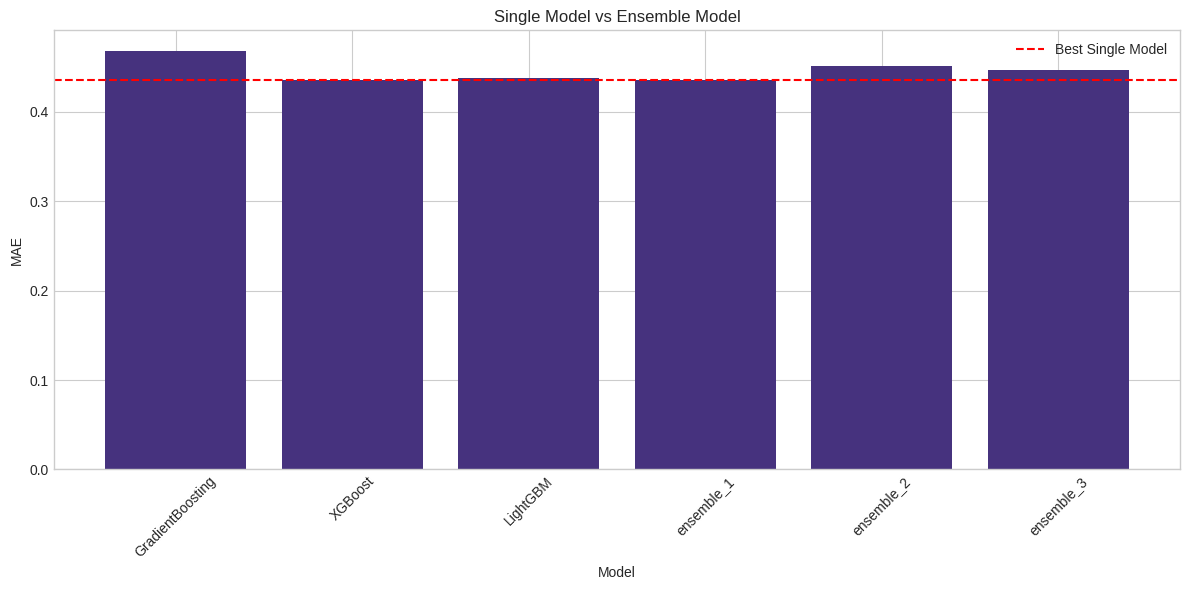

In [86]:
# Ïó¨Îü¨ Î™®Îç∏Ïùò ÏòàÏ∏°ÏùÑ Í∞ÄÏ§ë ÌèâÍ∑†ÌïòÎäî ÏïôÏÉÅÎ∏î
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# ÏïôÏÉÅÎ∏îÌï† Í∏∞Î≥∏ Î™®Îç∏Îì§
base_models = {
    'GradientBoosting': GradientBoostingRegressor(n_estimators=30, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=30, learning_rate=0.1, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=30, learning_rate=0.1, random_state=42)
}

# Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏°Í∞í Ï†ÄÏû•
base_preds = {}
base_scores = {}

for name, model in base_models.items():
    print(f"{name} Î™®Îç∏ ÌïôÏäµ Ï§ë...")
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    base_preds[name] = pred
    mae = mean_absolute_error(y_val, pred)
    base_scores[name] = mae
    print(f"{name} Î™®Îç∏ MAE: {mae:.4f}")

# Îã§ÏñëÌïú Í∞ÄÏ§ëÏπò Ï°∞Ìï© Ïã§Ìóò
weight_combinations = [
    {'XGBoost': 0.5, 'LightGBM': 0.5},
    {'GradientBoosting': 0.5, 'LightGBM': 0.5},
    {'GradientBoosting': 0.4, 'XGBoost': 0.3, 'LightGBM': 0.3},
]

ensemble_results = {}

for i, weights in enumerate(weight_combinations):
    ensemble_pred = np.zeros_like(list(base_preds.values())[0])
    for name, weight in weights.items():
        ensemble_pred += base_preds[name] * weight

    mae = mean_absolute_error(y_val, ensemble_pred)
    ensemble_results[f'ensemble_{i+1}'] = mae
    print(f"ÏïôÏÉÅÎ∏î_{i+1} MAE: {mae:.4f} | Ï°∞Ìï©: {weights}")

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
all_results = {**base_scores, **ensemble_results}
plt.bar(all_results.keys(), all_results.values())
plt.axhline(y=min(base_scores.values()), color='r', linestyle='--', label='Best Single Model')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('Single Model vs Ensemble Model')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

 #### 2.2 Ïä§ÌÉúÌÇπ ÏïôÏÉÅÎ∏î(Stacking Ensemble) Íµ¨ÌòÑ


In [87]:
# Ï†ÑÏ≤¥ÏóêÏÑú 5,000Í∞ú ÏÉòÌîåÎßå ÎûúÎç§ Ï∂îÏ∂ú (Ïû¨ÌòÑ Í∞ÄÎä•ÏÑ± ÏúÑÌï¥ random_state ÏßÄÏ†ï)
from sklearn.model_selection import train_test_split

X_small, _, y_small, _ = train_test_split(
    X_train, y_train,
    train_size=5000,
    random_state=42,
    stratify=None  # ÏúÑÌóòÍµ∞ Îì± Í∑†Ìòï Ïú†ÏßÄÌïòÎ†§Î©¥ stratify ÏÇ¨Ïö© Í∞ÄÎä•
)

print(f"üì¶ ÏÜåÌòï ÏÉòÌîå ÏÉùÏÑ± ÏôÑÎ£å: X_small={X_small.shape}, y_small={y_small.shape}")

üì¶ ÏÜåÌòï ÏÉòÌîå ÏÉùÏÑ± ÏôÑÎ£å: X_small=(5000, 197), y_small=(5000,)


In [88]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

# 1Îã®Í≥Ñ Í∏∞Î≥∏ Î™®Îç∏ Ï†ïÏùò
base_models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1),
    'LightGBM': LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)
}

# Î©îÌÉÄ Î™®Îç∏ Ï†ïÏùò
meta_model = Ridge(alpha=1.0)

# K-Fold ÏÑ§Ï†ï
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# OOF Ìï®Ïàò Ï†ïÏùò
def get_oof_predictions(models, X, y, X_test):
    oof_preds = np.zeros((X.shape[0], len(models)))
    test_preds = np.zeros((X_test.shape[0], len(models)))

    for i, (name, model) in enumerate(models.items()):
        test_fold_preds = np.zeros((X_test.shape[0], kf.n_splits))

        for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
            X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
            y_train_fold = y.iloc[train_idx]

            model.fit(X_train_fold, y_train_fold)
            oof_preds[val_idx, i] = model.predict(X_val_fold)
            test_fold_preds[:, fold] = model.predict(X_test)

        test_preds[:, i] = test_fold_preds.mean(axis=1)
        model.fit(X, y)

    return oof_preds, test_preds

# ‚ñ∂Ô∏è Ïã§ÌóòÏö© ÏÜåÌòï Îç∞Ïù¥ÌÑ∞ÏÖã ÏÇ¨Ïö©
X_tr, X_val, y_tr, y_val = train_test_split(X_small, y_small, test_size=0.2, random_state=42)

# Ïä§ÌÉúÌÇπ ÌõàÎ†®
oof_tr_preds, val_meta_features = get_oof_predictions(base_models, X_tr, y_tr, X_val)
meta_model.fit(oof_tr_preds, y_tr)
stacking_preds = meta_model.predict(val_meta_features)
stacking_mae = mean_absolute_error(y_val, stacking_preds)

print(f"‚úÖ ÏÜåÌòï Ïä§ÌÉúÌÇπ ÏïôÏÉÅÎ∏î Ïã§Ìóò MAE: {stacking_mae:.4f}")

‚úÖ ÏÜåÌòï Ïä§ÌÉúÌÇπ ÏïôÏÉÅÎ∏î Ïã§Ìóò MAE: 0.4382


### 3. ÌäπÏÑ± ÏÑ†ÌÉù Î∞è Ï§ëÏöîÎèÑ Î∂ÑÏÑù
#### 3.1 ÏàúÏ∞®Ï†Å ÌäπÏÑ± ÏÑ†ÌÉù Íµ¨ÌòÑ

In [89]:
# ÌäπÏÑ± Ï§ëÏöîÎèÑ Í∏∞Î∞ò ÏàúÏ∞®Ï†Å ÌäπÏÑ± ÏÑ†ÌÉù
from sklearn.feature_selection import SequentialFeatureSelector


# Í∏∞Î≥∏ Î™®Îç∏
gb_model_fast = GradientBoostingRegressor(n_estimators=10, max_depth=3, random_state=42)

# Forward Sequential Feature Selection
# Îπ†Î•∏ SFS ÏÑ§Ï†ï
sfs = SequentialFeatureSelector(
    gb_model_fast,
    n_features_to_select=10,  # 20 ‚Üí 10Í∞úÎ°ú Ïã§Ìóò
    direction='forward',
    scoring='neg_mean_absolute_error',
    cv=2,                     # 5 ‚Üí 2Î°ú Ï§ÑÏù¥Í∏∞
    n_jobs=-1
)


# ÌäπÏÑ± ÏÑ†ÌÉù ÏàòÌñâ (ÏãúÍ∞ÑÏù¥ Ïò§Îûò Í±∏Î¶¥ Ïàò ÏûàÏùå)
print("ÏàúÏ∞®Ï†Å ÌäπÏÑ± ÏÑ†ÌÉù ÏàòÌñâ Ï§ë...")
sfs.fit(X_small, y_small)

# ÏÑ†ÌÉùÎêú ÌäπÏÑ±
selected_features = X_small.columns[sfs.get_support()]
print(f"ÏÑ†ÌÉùÎêú ÌäπÏÑ± Ïàò: {len(selected_features)}")
print("ÏÑ†ÌÉùÎêú ÌäπÏÑ±:")
print(selected_features.tolist())

# ÏÑ†ÌÉùÎêú ÌäπÏÑ±ÎßåÏúºÎ°ú Î™®Îç∏ ÌïôÏäµ
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]

sfs_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
sfs_model.fit(X_train_selected, y_train)
sfs_pred = sfs_model.predict(X_val_selected)
sfs_mae = mean_absolute_error(y_val, sfs_pred)

# Ï†ÑÏ≤¥ ÌäπÏÑ± Í∏∞Ï§Ä MAE (ÎπÑÍµêÏö©)
full_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
full_model.fit(X_train, y_train)
base_mae = mean_absolute_error(y_val, full_model.predict(X_val))



print(f"ÏÑ†ÌÉùÎêú ÌäπÏÑ±Îßå ÏÇ¨Ïö©Ìïú Î™®Îç∏ MAE: {sfs_mae:.4f}")
print(f"Î™®Îì† ÌäπÏÑ± ÏÇ¨Ïö© MAEÏôÄÏùò Ï∞®Ïù¥: {(sfs_mae - base_mae) / base_mae * 100:.2f}%")


ÏàúÏ∞®Ï†Å ÌäπÏÑ± ÏÑ†ÌÉù ÏàòÌñâ Ï§ë...
ÏÑ†ÌÉùÎêú ÌäπÏÑ± Ïàò: 10
ÏÑ†ÌÉùÎêú ÌäπÏÑ±:
['cat12_A', 'cat53_encoded', 'cat57_encoded', 'cat79_encoded', 'cat80_encoded', 'cat81_encoded', 'cat94_encoded', 'cat100_encoded', 'cat101_encoded', 'cat103_encoded']
ÏÑ†ÌÉùÎêú ÌäπÏÑ±Îßå ÏÇ¨Ïö©Ìïú Î™®Îç∏ MAE: 0.4688
Î™®Îì† ÌäπÏÑ± ÏÇ¨Ïö© MAEÏôÄÏùò Ï∞®Ïù¥: 8.94%


#### 3.2 ÌäπÏÑ± Ï§ëÏöîÎèÑÏùò ÌÜµÍ≥ÑÏ†Å ÏïàÏ†ïÏÑ± Î∂ÑÏÑù

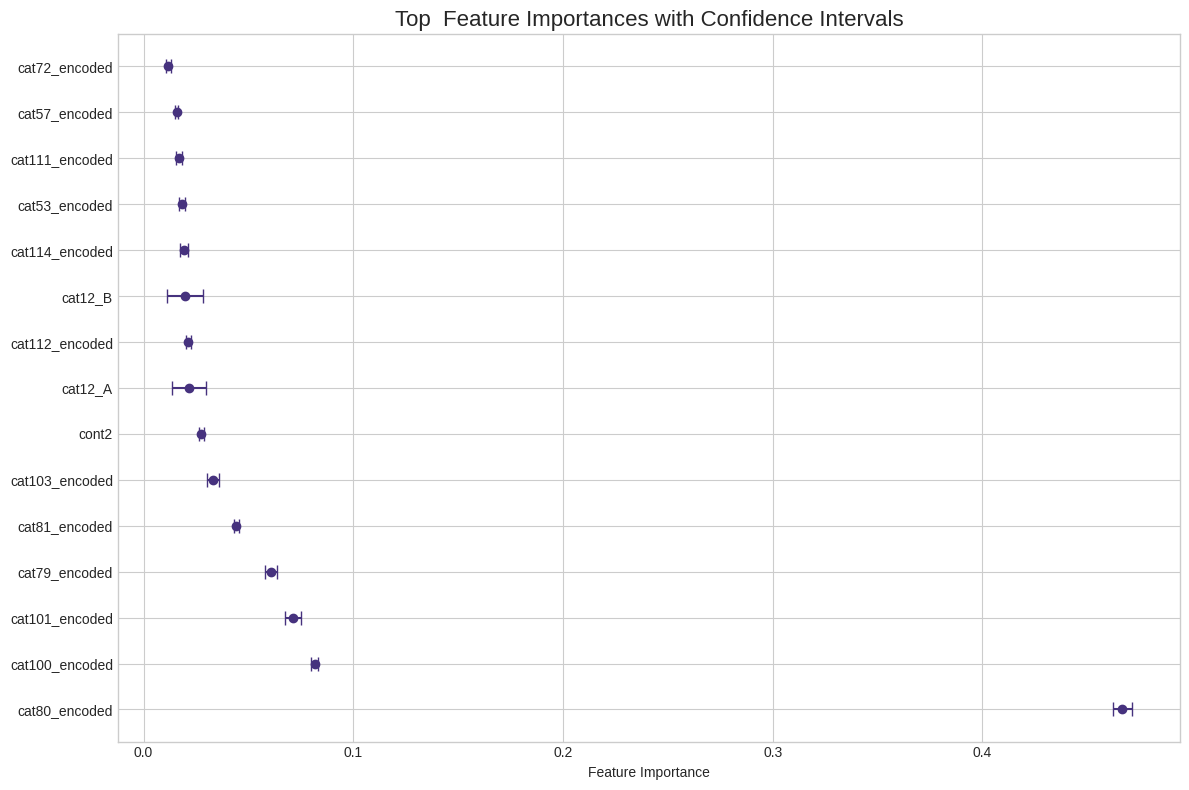

Í∞ÄÏû• ÏïàÏ†ïÏ†ÅÏù∏ ÌäπÏÑ± (ÎÇÆÏùÄ Î≥ÄÎèôÍ≥ÑÏàò):
            feature  mean_importance  coef_variation
143   cat80_encoded         0.466711        0.009709
163  cat100_encoded         0.081585        0.020282
144   cat81_encoded         0.044175        0.028408
1             cont2         0.027553        0.038204
120   cat57_encoded         0.015810        0.045221
142   cat79_encoded         0.060769        0.048434
175  cat112_encoded         0.021309        0.051905
164  cat101_encoded         0.071353        0.054185
116   cat53_encoded         0.018439        0.084476
166  cat103_encoded         0.033045        0.086717
174  cat111_encoded         0.016775        0.090988
135   cat72_encoded         0.011883        0.093013
171  cat108_encoded         0.010359        0.103634
177  cat114_encoded         0.019388        0.105788
6             cont7         0.009061        0.156124
179  cat116_encoded         0.005688        0.228524
181     gmm_cluster         0.010077        0.258

In [90]:
# Bootstrap ÏÉòÌîåÎßÅÏùÑ ÌÜµÌïú ÌäπÏÑ± Ï§ëÏöîÎèÑÏùò ÏïàÏ†ïÏÑ± Î∂ÑÏÑù
from sklearn.utils import resample

# Î™®Îç∏ Ï†ïÏùò
model = GradientBoostingRegressor(n_estimators=30, random_state=42)

# Bootstrap Î∞òÎ≥µ ÌöüÏàò
n_iterations = 15
n_features = X_train.shape[1]

# Í≤∞Í≥º Ï†ÄÏû•Ïö© Î∞∞Ïó¥
all_importances = np.zeros((n_iterations, n_features))

# Bootstrap ÏÉòÌîåÎßÅ Î∞è ÌäπÏÑ± Ï§ëÏöîÎèÑ Í≥ÑÏÇ∞
for i in range(n_iterations):
    # Bootstrap ÏÉòÌîå ÏÉùÏÑ±
    X_boot, y_boot = resample(X_train, y_train, random_state=i)

    # Î™®Îç∏ ÌïôÏäµ
    model.fit(X_boot, y_boot)

    # ÌäπÏÑ± Ï§ëÏöîÎèÑ Ï†ÄÏû•
    all_importances[i, :] = model.feature_importances_

# ÌäπÏÑ±Î≥Ñ Ï§ëÏöîÎèÑ ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®
mean_importance = np.mean(all_importances, axis=0)
std_importance = np.std(all_importances, axis=0)

# Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'mean_importance': mean_importance,
    'std_importance': std_importance,
    'coef_variation': std_importance / mean_importance  # Î≥ÄÎèôÍ≥ÑÏàò
})

# Ï§ëÏöîÎèÑ Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨
feature_importance_df = feature_importance_df.sort_values('mean_importance', ascending=False)

# ÏÉÅÏúÑ 15Í∞ú ÌäπÏÑ± ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
top_features = feature_importance_df.head(15)

# ÌäπÏÑ± Ï§ëÏöîÎèÑÏôÄ Ïã†Î¢∞Íµ¨Í∞Ñ ÏãúÍ∞ÅÌôî
plt.errorbar(
    top_features['mean_importance'],
    top_features['feature'],
    xerr=top_features['std_importance'],
    fmt='o',
    capsize=5
)

plt.title('Top  Feature Importances with Confidence Intervals', fontsize=16)
plt.xlabel('Feature Importance')
plt.grid(True)
plt.tight_layout()
plt.show()

# Î≥ÄÎèôÍ≥ÑÏàòÍ∞Ä ÎÇÆÏùÄ(ÏïàÏ†ïÏ†ÅÏù∏) ÌäπÏÑ±Îì§
stable_features = feature_importance_df.sort_values('coef_variation').head(20)
print("Í∞ÄÏû• ÏïàÏ†ïÏ†ÅÏù∏ ÌäπÏÑ± (ÎÇÆÏùÄ Î≥ÄÎèôÍ≥ÑÏàò):")
print(stable_features[['feature', 'mean_importance', 'coef_variation']])


### 4. ÎèÑÎ©îÏù∏ ÌäπÌôî Î™®Îç∏ÎßÅ Ï†ëÍ∑ºÎ≤ï
#### 4.1 Ïª§Ïä§ÌÖÄ ÏÜêÏã§ Ìï®Ïàò Íµ¨ÌòÑ

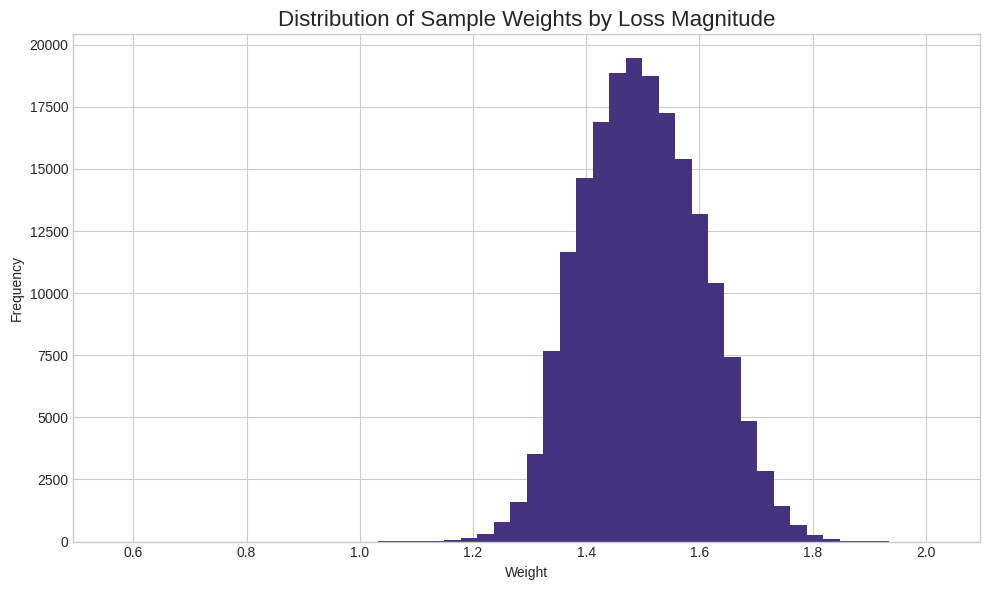

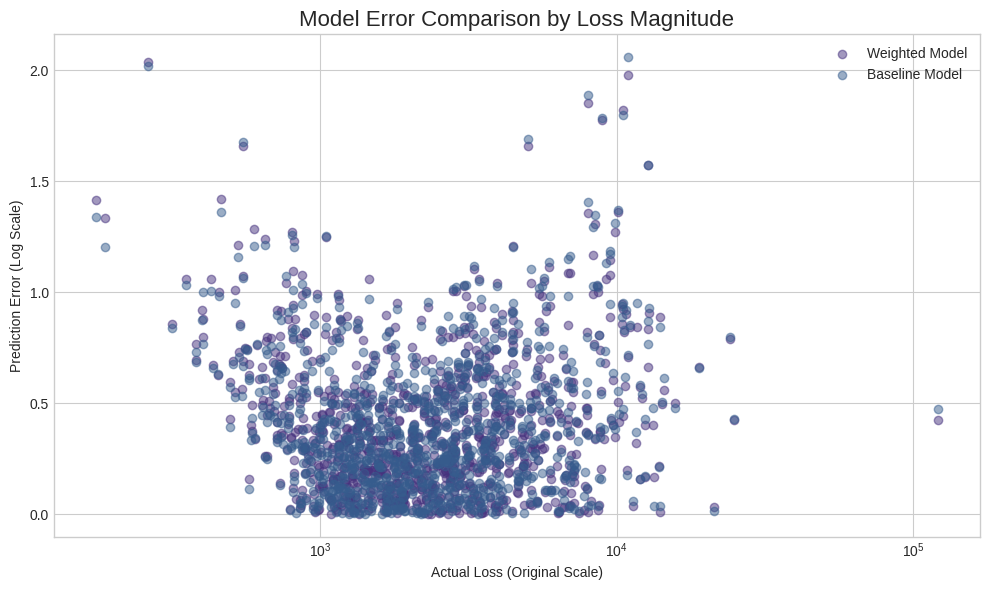

Í∞ÄÏ§ëÏπò Ï†ÅÏö© Î™®Îç∏ MAE: 0.4037
Í∏∞Î≥∏ Î™®Îç∏ MAE: 0.4042
MAE Ï∞®Ïù¥: -0.14%

ÎåÄÌòï ÏÜêÏã§(ÏÉÅÏúÑ 10%)Ïóê ÎåÄÌïú ÏÑ±Îä•:
Í∞ÄÏ§ëÏπò Ï†ÅÏö© Î™®Îç∏ MAE: 0.5830
Í∏∞Î≥∏ Î™®Îç∏ MAE: 0.6045
Í∞úÏÑ†Ïú®: 3.56%


In [91]:
# Î≥¥Ìóò ÎèÑÎ©îÏù∏Ïóê ÌäπÌôîÎêú Ïª§Ïä§ÌÖÄ ÏÜêÏã§ Ìï®Ïàò Íµ¨ÌòÑ
# ÌÅ∞ ÏÜêÏã§Ïóê Îçî ÌÅ∞ ÌéòÎÑêÌã∞Î•º Î∂ÄÏó¨ÌïòÎäî Í∞ÄÏ§ë MAE
import xgboost as xgb
from sklearn.model_selection import train_test_split

# ÏÜêÏã§ ÌÅ¨Í∏∞Ïóê Îî∞Î•∏ Í∞ÄÏ§ëÏπò Ìï®Ïàò
def calculate_weights(y):
    # ÏòàÏ∏° ÏÜêÏã§Ïù¥ ÌÅ¥ÏàòÎ°ù Îçî ÌÅ∞ Í∞ÄÏ§ëÏπò Î∂ÄÏó¨
    # Î°úÍ∑∏Ïä§ÏºÄÏùº Í∞ÄÏ†ï
    y_exp = np.exp(y) - 1  # ÏõêÎûò Ïä§ÏºÄÏùºÎ°ú Î≥ÄÌôò
    weights = np.log1p(y_exp) / np.mean(np.log1p(y_exp))  # Ï†ïÍ∑úÌôîÎêú Í∞ÄÏ§ëÏπò
    return weights + 0.5  # Í∏∞Î≥∏ Í∞ÄÏ§ëÏπò Ï∂îÍ∞Ä

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞
sample_weights = calculate_weights(y_train.values)

# Í∞ÄÏ§ëÏπò Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.hist(sample_weights, bins=50)
plt.title('Distribution of Sample Weights by Loss Magnitude', fontsize=16)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# XGBoostÏùò Í≤ΩÏö∞ sample_weight Îß§Í∞úÎ≥ÄÏàòÎ°ú Í∞ÄÏ§ëÏπò Ï†ÑÎã¨
weighted_xgb = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Í∞ÄÏ§ëÏπòÎ•º Ï†ÅÏö©Ìïú Î™®Îç∏ ÌïôÏäµ
weighted_xgb.fit(X_train, y_train, sample_weight=sample_weights)

# Í∞ÄÏ§ëÏπò ÏóÜÎäî Í∏∞Î≥∏ Î™®Îç∏
regular_xgb = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
regular_xgb.fit(X_train, y_train)

# Í≤ÄÏ¶ù ÏÑ∏Ìä∏ÏóêÏÑú ÏÑ±Îä• ÎπÑÍµê
weighted_pred = weighted_xgb.predict(X_val)
regular_pred = regular_xgb.predict(X_val)

weighted_mae = mean_absolute_error(y_val, weighted_pred)
regular_mae = mean_absolute_error(y_val, regular_pred)

# ÏÜêÏã§ ÌÅ¨Í∏∞Î≥Ñ Ïò§Ï∞® Î∂ÑÏÑù
val_loss_exp = np.exp(y_val) - 1  # ÏõêÎûò Ïä§ÏºÄÏùºÎ°ú Î≥ÄÌôò
weighted_error = np.abs(y_val - weighted_pred)
regular_error = np.abs(y_val - regular_pred)

# ÏÜêÏã§ ÌÅ¨Í∏∞Ïóê Îî∞Î•∏ Ïò§Ï∞® ÎπÑÍµê
plt.figure(figsize=(10, 6))
plt.scatter(val_loss_exp, weighted_error, alpha=0.5, label='Weighted Model')
plt.scatter(val_loss_exp, regular_error, alpha=0.5, label='Baseline Model')
plt.xscale('log')
plt.xlabel('Actual Loss (Original Scale)')
plt.ylabel('Prediction Error (Log Scale)')
plt.title('Model Error Comparison by Loss Magnitude', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Í∞ÄÏ§ëÏπò Ï†ÅÏö© Î™®Îç∏ MAE: {weighted_mae:.4f}")
print(f"Í∏∞Î≥∏ Î™®Îç∏ MAE: {regular_mae:.4f}")
print(f"MAE Ï∞®Ïù¥: {(weighted_mae - regular_mae) / regular_mae * 100:.2f}%")

# ÎåÄÌòï ÏÜêÏã§(ÏÉÅÏúÑ 10%)Ïóê ÎåÄÌïú ÏÑ±Îä• ÎπÑÍµê
large_loss_threshold = np.percentile(y_val, 90)
large_loss_mask = y_val > large_loss_threshold

large_loss_weighted_mae = mean_absolute_error(
    y_val[large_loss_mask],
    weighted_pred[large_loss_mask]
)
large_loss_regular_mae = mean_absolute_error(
    y_val[large_loss_mask],
    regular_pred[large_loss_mask]
)

print(f"\nÎåÄÌòï ÏÜêÏã§(ÏÉÅÏúÑ 10%)Ïóê ÎåÄÌïú ÏÑ±Îä•:")
print(f"Í∞ÄÏ§ëÏπò Ï†ÅÏö© Î™®Îç∏ MAE: {large_loss_weighted_mae:.4f}")
print(f"Í∏∞Î≥∏ Î™®Îç∏ MAE: {large_loss_regular_mae:.4f}")
print(f"Í∞úÏÑ†Ïú®: {(large_loss_regular_mae - large_loss_weighted_mae) / large_loss_regular_mae * 100:.2f}%")


### 4.2 Í≥†Í∞ù ÌäπÏÑ±Î≥Ñ ÏÑ∏Î∂ÑÌôî Î™®Îç∏

In [92]:
# Í∏∞Î≥∏ Î™®Îç∏Î°ú Ï§ëÏöîÎèÑ Í≥ÑÏÇ∞
from lightgbm import LGBMRegressor

temp_model = LGBMRegressor(n_estimators=30, random_state=42)
temp_model.fit(X_train, y_train)

feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': temp_model.feature_importances_
}).sort_values(by='importance', ascending=False)

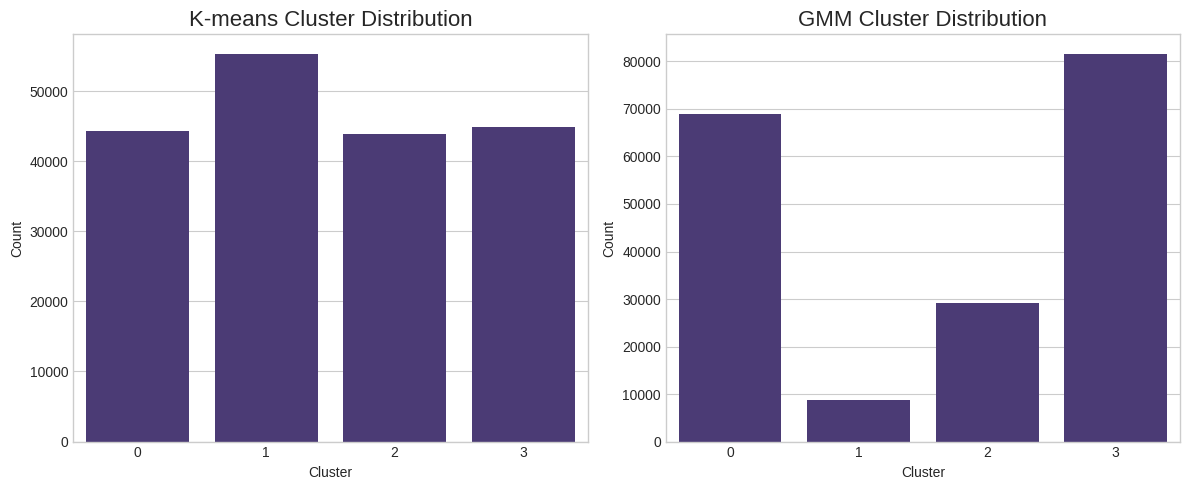

In [93]:
# Í≥†Í∞ù ÌäπÏÑ±Î≥Ñ ÏÑ∏Î∂ÑÌôî Î™®Îç∏ Íµ¨ÌòÑ
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÑ ÏúÑÌïú ÌäπÏÑ± ÏÑ†ÌÉù
# Ï§ëÏöî ÌäπÏÑ± 50Í∞ú ÏÑ†ÌÉù
top_features = feature_importance_df['feature'].head(50).tolist()
cluster_data = X_train[top_features].copy()

# K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
X_train['kmeans_cluster'] = kmeans.fit_predict(cluster_data)
X_val['kmeans_cluster'] = kmeans.predict(X_val[top_features])

# GMM ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
gmm = GaussianMixture(n_components=4, random_state=42)
X_train['gmm_cluster'] = gmm.fit_predict(cluster_data)
X_val['gmm_cluster'] = gmm.predict(X_val[top_features])

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))

# K-means cluster distribution
plt.subplot(1, 2, 1)
sns.countplot(x='kmeans_cluster', data=X_train)
plt.title('K-means Cluster Distribution', fontsize=16)
plt.xlabel('Cluster')
plt.ylabel('Count')

# GMM cluster distribution
plt.subplot(1, 2, 2)
sns.countplot(x='gmm_cluster', data=X_train)
plt.title('GMM Cluster Distribution', fontsize=16)
plt.xlabel('Cluster')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



### 5. ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏°

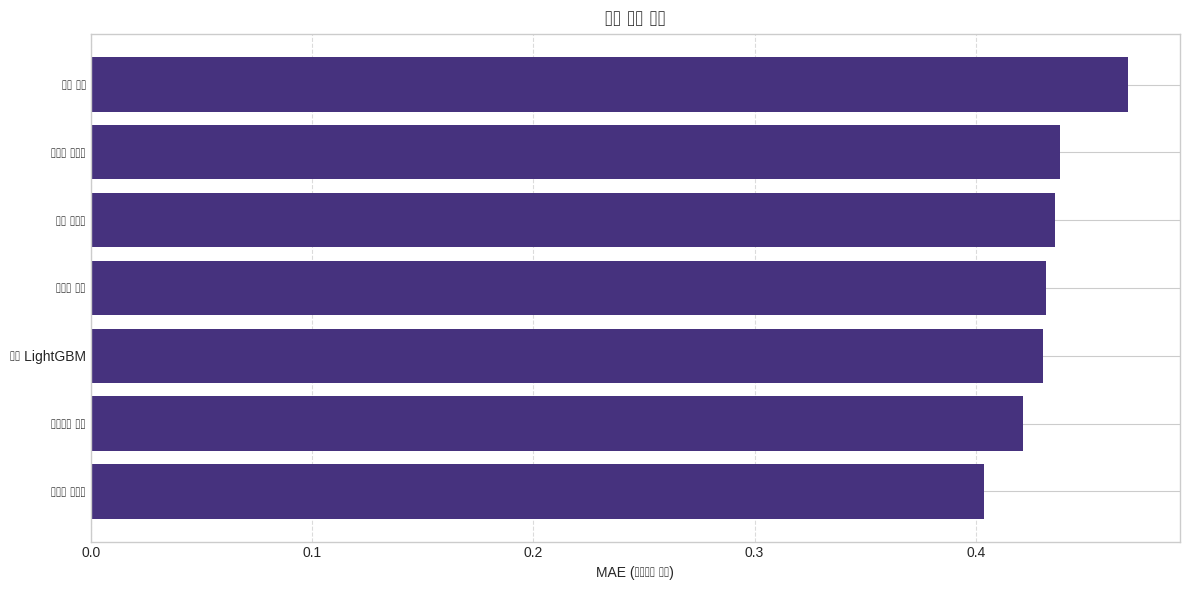

üìä ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏: Í∞ÄÏ§ëÏπò ÏÉòÌîåÎßÅ, MAE: 0.4037


In [94]:
# Î™®Îì† Ïã§Ìóò Î™®Îç∏Ïùò ÏÑ±Îä• ÎπÑÍµê
model_performance = {
    'Í∏∞Î≥∏ LightGBM': base_mae,
    'ÏÉÅÌò∏ÏûëÏö© ÌäπÏÑ±': interaction_mae,
    'Îã§Ìï≠Ïãù ÌäπÏÑ±': poly_mae,
    'Í∞ÄÏ§ë ÏïôÏÉÅÎ∏î': min(ensemble_results.values()),
    'Ïä§ÌÉúÌÇπ ÏïôÏÉÅÎ∏î': stacking_mae,
    'ÌäπÏÑ± ÏÑ†ÌÉù': sfs_mae,
    'Í∞ÄÏ§ëÏπò ÏÉòÌîåÎßÅ': weighted_mae
}

# ÏÑ±Îä• ÎπÑÍµê ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
models = list(model_performance.keys())
scores = list(model_performance.values())

# ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
sorted_idx = np.argsort(scores)
plt.barh([models[i] for i in sorted_idx], [scores[i] for i in sorted_idx])
plt.xlabel('MAE (ÎÇÆÏùÑÏàòÎ°ù Ï¢ãÏùå)')
plt.title('Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ ÌôïÏù∏
best_model_name = models[np.argmin(scores)]
best_score = min(scores)
print(f"üìä ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏: {best_model_name}, MAE: {best_score:.4f}")


# Î≥¥ÌóòÎ£å

## 1.Î≥¥ÌóòÎ£å ÏÇ∞Ï∂ú Î∞è Î∂ÑÏÑù

In [46]:
# Î≥¥ÌóòÎ£å Í≥ÑÏÇ∞ (Í∏∞Î≥∏ ÏÇ∞Ï∂ú Î∞©Ïãù)
base_loading = 0.2  # Í∏∞Î≥∏ Î°úÎî©Î•†
base_margin = 0.1   # Í∏∞Î≥∏ ÎßàÏßÑ
base_premium = test_pred_loss * (1 + base_loading + base_margin)

In [47]:
# Î¶¨Ïä§ÌÅ¨ ÌäπÏÑ±Î≥Ñ Î°úÎî©Î•† Ï∞®Îì±Ìôî - ÏÉàÎ°úÏö¥ Ï†ëÍ∑ºÎ≤ï
# ÏòàÏ∏°Îêú ÏÜêÌï¥Ïï° ÌÅ¨Í∏∞Ïóê Îî∞Îùº Î°úÎî©Î•† Ï∞®Îì± Ï†ÅÏö©
loss_quantiles = np.percentile(test_pred_loss, [25, 50, 75, 90])

def get_risk_loading(loss):
    if loss < loss_quantiles[0]:
        return 0.15  # ÎÇÆÏùÄ ÏÜêÌï¥ ÏòàÏÉÅ -> ÎÇÆÏùÄ Î°úÎî©Î•†
    elif loss < loss_quantiles[1]:
        return 0.18
    elif loss < loss_quantiles[2]:
        return 0.22
    elif loss < loss_quantiles[3]:
        return 0.25
    else:
        return 0.30  # ÎÜíÏùÄ ÏÜêÌï¥ ÏòàÏÉÅ -> ÎÜíÏùÄ Î°úÎî©Î•†


In [48]:
# Î°úÎî©Î•† Ï∞®Îì± Ï†ÅÏö©
dynamic_loading = np.array([get_risk_loading(loss) for loss in test_pred_loss])
dynamic_premium = test_pred_loss * (1 + dynamic_loading + base_margin)


In [49]:
# Î≥¥ÌóòÎ£å ÏÇ∞Ï∂ú Í≤∞Í≥º ÎπÑÍµê
premium_comparison = pd.DataFrame({
    'id': test_df['id'],
    'predicted_loss': test_pred_loss,
    'base_premium': base_premium,
    'dynamic_premium': dynamic_premium,
    'loading_rate': dynamic_loading
})

# ÏùºÎ∂Ä ÌôïÏù∏
premium_comparison.head()

id  predicted_loss  base_premium  dynamic_premium  loading_rate
0   4     2029.263028   2638.041937      2597.456676          0.18
1   6     2336.751413   3037.776836      2991.041808          0.18
2   9    10178.788248  13232.424723     14250.303548          0.30
3  12     7170.072975   9321.094867     10038.102165          0.30
4  15      889.922381   1156.899095      1112.402976          0.15

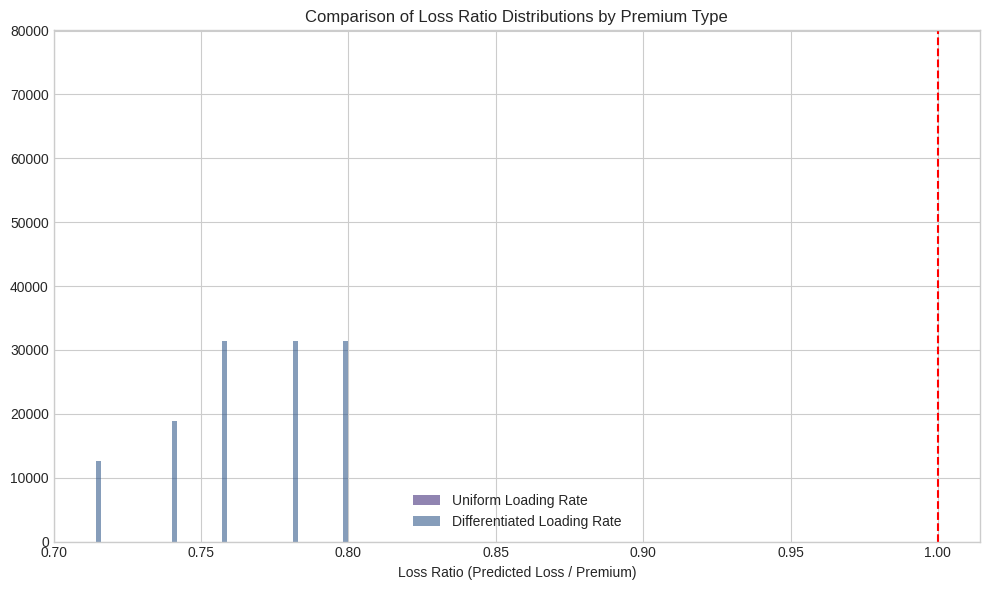

In [50]:
# ÏÜêÌï¥Ïú® Í≥ÑÏÇ∞ (ÏòàÏ∏° ÏÜêÌï¥Ïï° / Î≥¥ÌóòÎ£å)
premium_comparison['base_claim_ratio'] = premium_comparison['predicted_loss'] / premium_comparison['base_premium']
premium_comparison['dynamic_claim_ratio'] = premium_comparison['predicted_loss'] / premium_comparison['dynamic_premium']

# ÏÜêÌï¥Ïú® Î∂ÑÌè¨ ÎπÑÍµê
plt.figure(figsize=(10,6))
plt.hist(premium_comparison['base_claim_ratio'], bins=50, alpha=0.6, label='Uniform Loading Rate')
plt.hist(premium_comparison['dynamic_claim_ratio'], bins=50, alpha=0.6, label='Differentiated Loading Rate')
plt.axvline(x=1.0, color='red', linestyle='--')
plt.title('Comparison of Loss Ratio Distributions by Premium Type')
plt.xlabel('Loss Ratio (Predicted Loss / Premium)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 2. Í≥†Í∞ù Î¶¨Ïä§ÌÅ¨ ÏÑ∏Í∑∏Î®ºÌä∏ Î∂ÑÏÑù


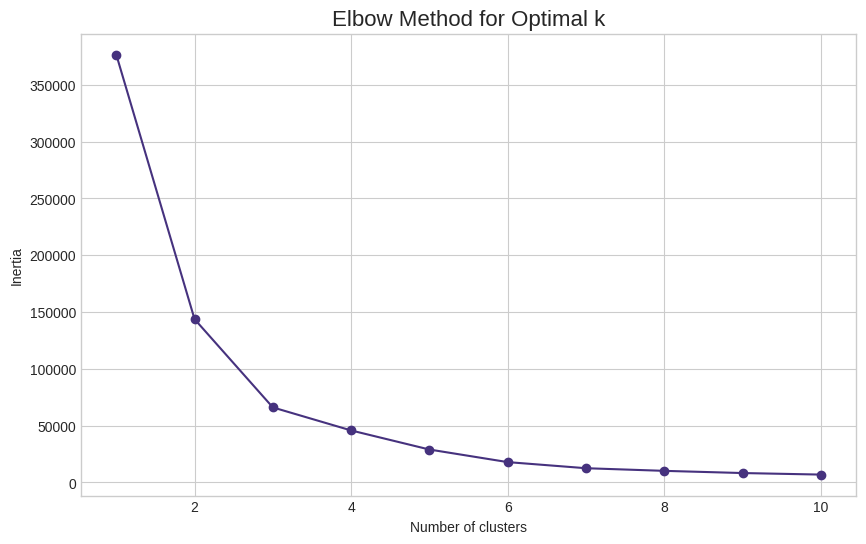

In [52]:
# Í≥†Í∞ù Î¶¨Ïä§ÌÅ¨ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
from sklearn.cluster import KMeans

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÑ ÏúÑÌïú ÌäπÏÑ± ÏÑ†ÌÉù
cluster_features = ['predicted_loss', 'dynamic_premium', 'dynamic_claim_ratio']
cluster_data = premium_comparison[cluster_features].copy()

# Î≥ÄÏàò Ïä§ÏºÄÏùºÎßÅ
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò Í≤∞Ï†ï (ÏóòÎ≥¥Ïö∞ Î∞©Ïãù)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [53]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Ï†ÅÏö© (ÏµúÏ†Å k ÏÑ†ÌÉù ÌõÑ)
optimal_k = 4  # ÏóòÎ≥¥Ïö∞ Í≥°ÏÑ†ÏóêÏÑú ÏãùÎ≥ÑÎêú ÏµúÏ†ÅÍ∞í
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
premium_comparison['risk_segment'] = kmeans.fit_predict(scaled_data)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌÜµÍ≥Ñ Î∂ÑÏÑù
segment_stats = premium_comparison.groupby('risk_segment').agg({
    'predicted_loss': ['mean', 'min', 'max', 'count'],
    'dynamic_premium': ['mean', 'min', 'max'],
    'dynamic_claim_ratio': ['mean', 'min', 'max']
})

print("Statics of Risk Segment:")
print(segment_stats)

Statics of Risk Segment:
             predicted_loss                                   dynamic_premium  \
                       mean          min           max  count            mean   
risk_segment                                                                    
0               1836.369776   532.413894   2640.755765  62773     2328.861204   
1               6522.920357  5108.374754   8921.756314  15868     9003.994721   
2              11491.635588  8922.293990  63782.102705   3942    16088.289823   
3               3591.405546  2640.773325   5108.183102  42963     4777.213471   

                                         dynamic_claim_ratio            \
                       min           max                mean       min   
risk_segment                                                             
0               665.517368   3380.167379            0.790625  0.781250   
1              6896.305918  12490.458840            0.726381  0.714286   
2             12491.211585  89294.943

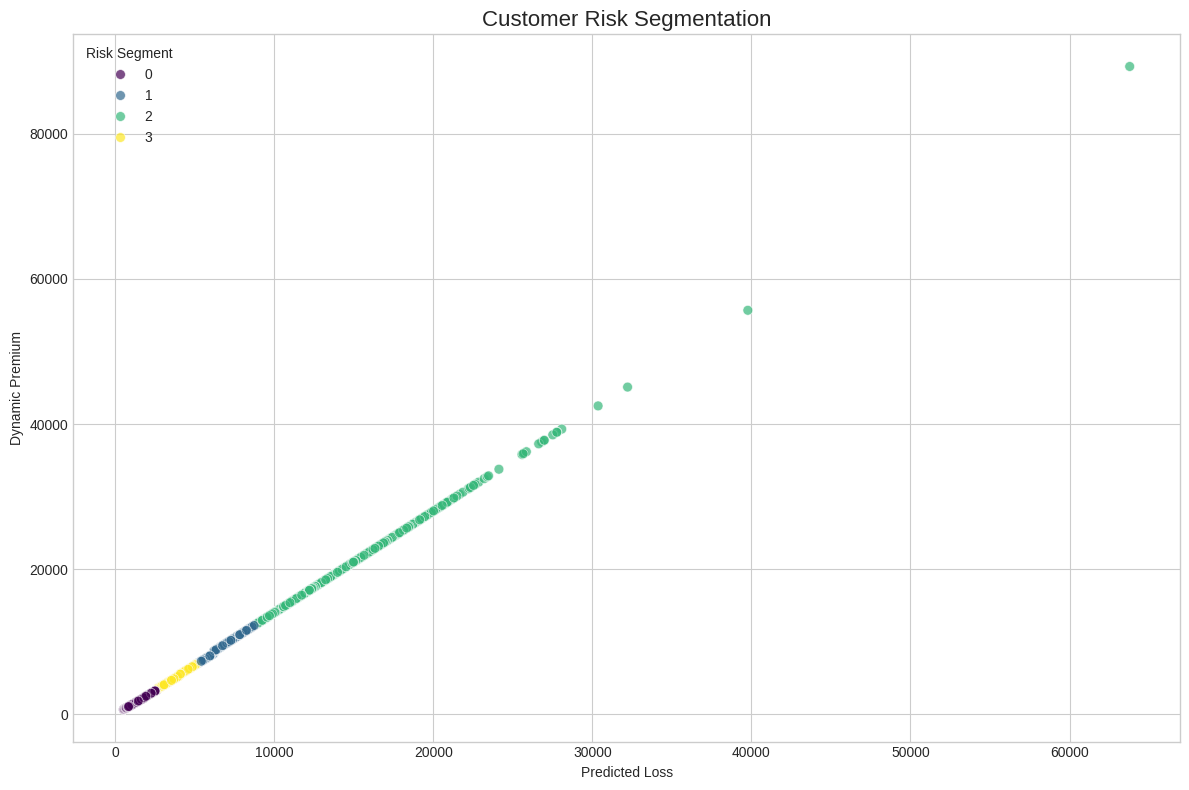

In [54]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=premium_comparison,
    x='predicted_loss',
    y='dynamic_premium',
    hue='risk_segment',
    palette='viridis',
    alpha=0.7,
    s=50
)
plt.title('Customer Risk Segmentation', fontsize=16)
plt.xlabel('Predicted Loss')
plt.ylabel('Dynamic Premium')
plt.grid(True)
plt.legend(title='Risk Segment')
plt.tight_layout()
plt.show()

## 3. Î≥¥ÌóòÎ£å ÏµúÏ†ÅÌôî Î™®Îç∏

In [55]:
# ÏµúÏ†Å Î≥¥ÌóòÎ£å ÏÇ∞Ï∂ú Î™®Îç∏ Í∞úÎ∞ú
# - Î¶¨Ïä§ÌÅ¨ ÏÑ∏Í∑∏Î®ºÌä∏Î≥Ñ ÌäπÏÑ±Ïóê Í∏∞Î∞òÌïú ÏöîÏú® Î™®Îç∏

# ÏöîÏú® Í≥ÑÏàò Í≥ÑÏÇ∞ (ÏòàÏ∏° ÏÜêÌï¥Ïï° ÎåÄÎπÑ Î≥¥ÌóòÎ£å ÎπÑÏú®)
premium_comparison['rate_factor'] = premium_comparison['dynamic_premium'] / premium_comparison['predicted_loss']

# ÏöîÏú® Î™®Îç∏ ÌïôÏäµÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X_rate = X_test.copy()  # Î™®Îì† ÏòàÏ∏° Î™®Îç∏ ÏûÖÎ†• ÌäπÏÑ± Ïû¨ÏÇ¨Ïö©
y_rate = premium_comparison['rate_factor']  # Î™©Ìëú: ÏöîÏú® Í≥ÑÏàò ÏòàÏ∏°

# ÏöîÏú® Î™®Îç∏ ÌïôÏäµ
from sklearn.ensemble import GradientBoostingRegressor
rate_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    min_samples_split=20,
    random_state=42
)

rate_model.fit(X_rate, y_rate)

# ÏöîÏú® ÏòàÏ∏° Î∞è ÏµúÏ†Å Î≥¥ÌóòÎ£å Í≥ÑÏÇ∞
predicted_rate = rate_model.predict(X_rate)
premium_comparison['optimized_premium'] = premium_comparison['predicted_loss'] * predicted_rate
premium_comparison['optimized_claim_ratio'] = premium_comparison['predicted_loss'] / premium_comparison['optimized_premium']


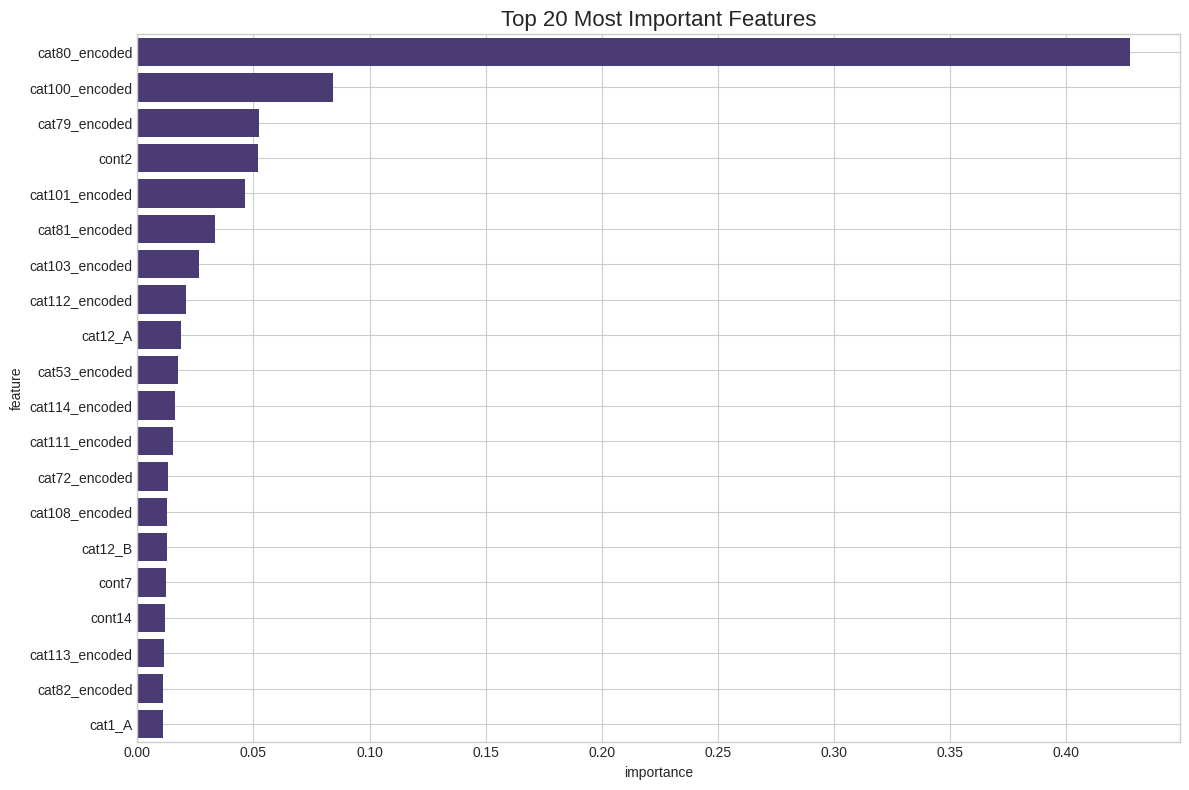

In [56]:
# ÏöîÏú® Î™®Îç∏Ïùò ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù
rate_importances = rate_model.feature_importances_
rate_features = X_rate.columns

rate_imp_df = pd.DataFrame({'feature': rate_features, 'importance': rate_importances})
rate_imp_df = rate_imp_df.sort_values('importance', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=rate_imp_df)
plt.title('Top 20 Most Important Features', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

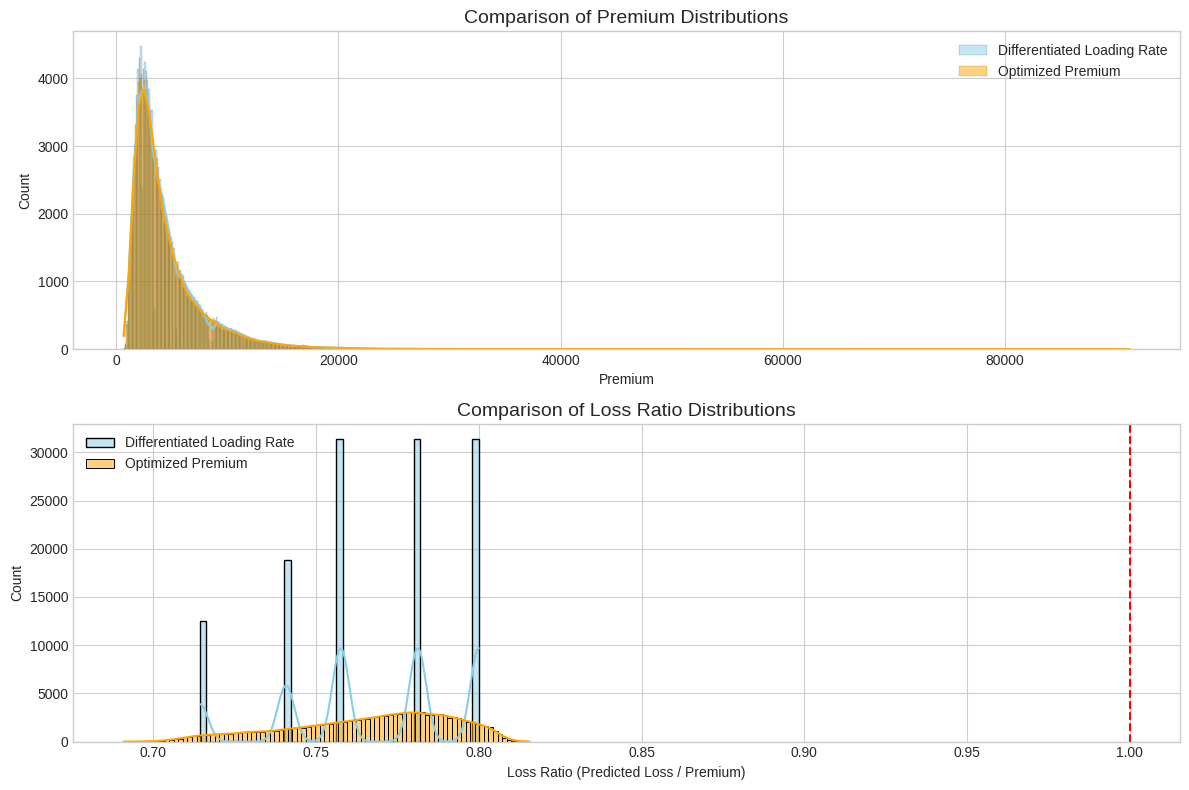

In [57]:
# ÏµúÏ†ÅÌôîÎêú Î≥¥ÌóòÎ£å Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))

# 1Î≤à Í∑∏ÎûòÌîÑ: Î≥¥ÌóòÎ£å Î∂ÑÌè¨ ÎπÑÍµê ‚Üí Premium distribution comparison
plt.subplot(2, 1, 1)
sns.histplot(premium_comparison['dynamic_premium'], color='skyblue', kde=True, label='Differentiated Loading Rate')
sns.histplot(premium_comparison['optimized_premium'], color='orange', kde=True, label='Optimized Premium')
plt.title('Comparison of Premium Distributions', fontsize=14)
plt.xlabel('Premium')
plt.legend()

# 2Î≤à Í∑∏ÎûòÌîÑ: ÏÜêÌï¥Ïú® Î∂ÑÌè¨ ÎπÑÍµê ‚Üí Loss ratio distribution comparison
plt.subplot(2, 1, 2)
sns.histplot(premium_comparison['dynamic_claim_ratio'], color='skyblue', kde=True, label='Differentiated Loading Rate')
sns.histplot(premium_comparison['optimized_claim_ratio'], color='orange', kde=True, label='Optimized Premium')
plt.axvline(x=1.0, color='red', linestyle='--')
plt.title('Comparison of Loss Ratio Distributions', fontsize=14)
plt.xlabel('Loss Ratio (Predicted Loss / Premium)')
plt.legend()

plt.tight_layout()
plt.show()

## 4. Î≥¥ÌóòÎ£å Ï°∞Ï†ï ÏãúÎÆ¨Î†àÏù¥ÏÖò

In [58]:
# Î≥¥ÌóòÎ£å Ïù∏ÏÉÅ/Ïù∏Ìïò ÏãúÎÇòÎ¶¨Ïò§ ÏãúÎÆ¨Î†àÏù¥ÏÖò
scenarios = {
    'Base': premium_comparison['optimized_premium'],
    '5% Increase': premium_comparison['optimized_premium'] * 1.05,
    '10% Increase': premium_comparison['optimized_premium'] * 1.10,
    '5% Decrease': premium_comparison['optimized_premium'] * 0.95
}

# ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÏÜêÌï¥Ïú® Í≥ÑÏÇ∞
scenario_results = {}
for name, premium in scenarios.items():
    claim_ratio = premium_comparison['predicted_loss'] / premium
    avg_ratio = claim_ratio.mean()
    profitable_pct = (claim_ratio < 1.0).mean() * 100

    scenario_results[name] = {
        'Average Loss Ratio': avg_ratio,
        'Profitable Customers (%)': profitable_pct,
        'Total Premium': premium.sum(),
        'Premium Change (%)': (premium.sum() / scenarios['Base'].sum() - 1) * 100
    }

# Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
scenario_df = pd.DataFrame(scenario_results).T
print("\nAnalysis of Premium Adjustment Scenarios:")
print(scenario_df)


Analysis of Premium Adjustment Scenarios:
              Average Loss Ratio  Profitable Customers (%)  Total Premium  \
Base                    0.767071                     100.0   5.568875e+08   
5% Increase             0.730544                     100.0   5.847319e+08   
10% Increase            0.697337                     100.0   6.125763e+08   
5% Decrease             0.807443                     100.0   5.290431e+08   

              Premium Change (%)  
Base                         0.0  
5% Increase                  5.0  
10% Increase                10.0  
5% Decrease                 -5.0  


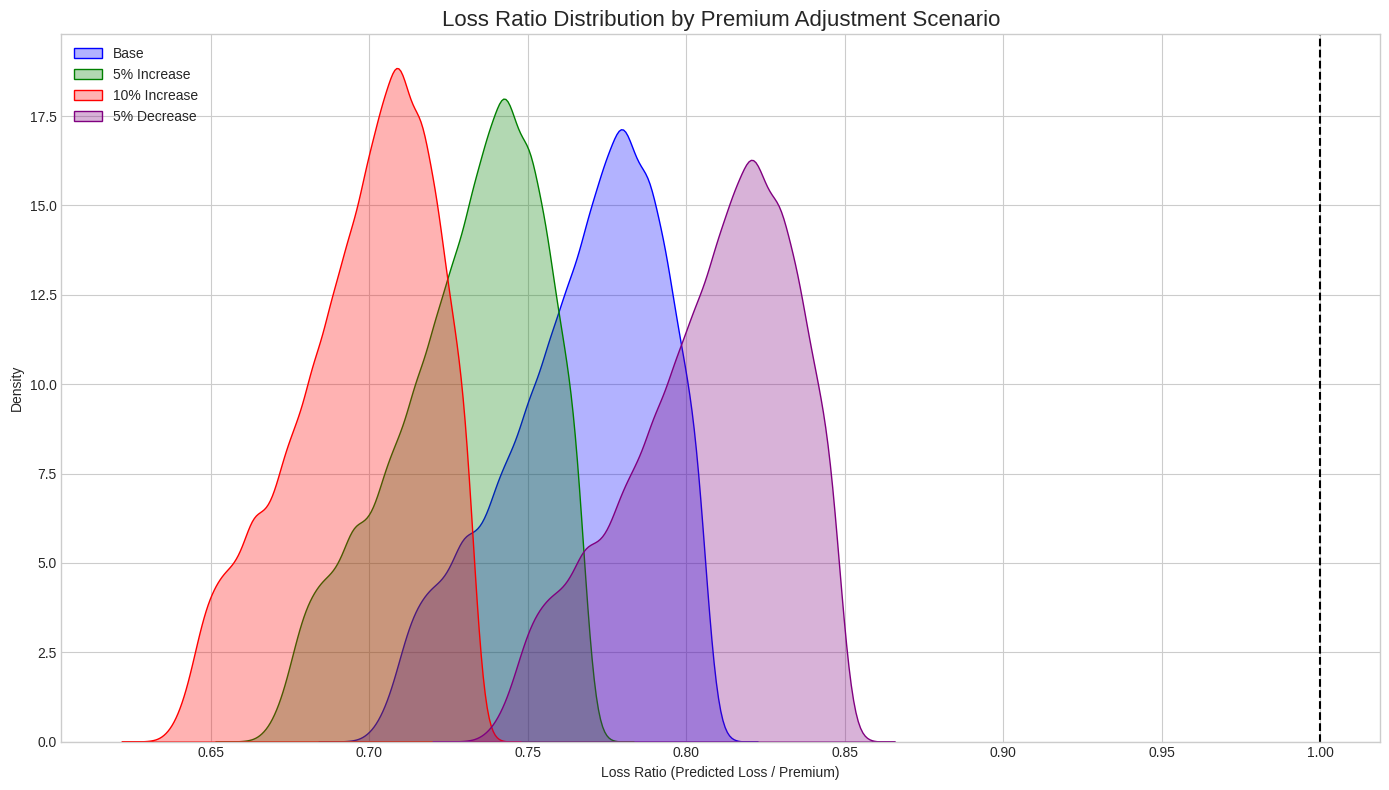

In [59]:
# ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÏÜêÌï¥Ïú® Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
colors = ['blue', 'green', 'red', 'purple']

for i, (name, premium) in enumerate(scenarios.items()):
    claim_ratio = premium_comparison['predicted_loss'] / premium
    sns.kdeplot(claim_ratio, label=name, color=colors[i], fill=True, alpha=0.3)

plt.axvline(x=1.0, color='black', linestyle='--')
plt.title('Loss Ratio Distribution by Premium Adjustment Scenario', fontsize=16)
plt.xlabel('Loss Ratio (Predicted Loss / Premium)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. ÏÜêÏùµÍ∏∞Î∞ò ÏàòÏùµÏÑ± Î∂ÑÏÑù

In [60]:
# Í∏∞Î≥∏ Îç∞Ïù¥ÌÑ∞
premium = premium_comparison['optimized_premium']
loss = premium_comparison['predicted_loss']
claim_ratio = loss / premium

# ÏàòÏùµÏÑ± ÏßÄÌëú Í≥ÑÏÇ∞
total_premium = premium.sum()
total_loss = loss.sum()
total_profit = total_premium - total_loss
overall_claim_ratio = total_loss / total_premium
loss_ratio_over_1_pct = (claim_ratio > 1.0).mean() * 100

# ÏÜêÌï¥Ïú® ÏÉÅÏúÑ 10% Í≥†Í∞ùÏùò ÏÜêÌï¥Ïï° ÎπÑÏ§ë
top_10_loss_share = (
    loss[claim_ratio >= claim_ratio.quantile(0.9)].sum() / total_loss
) * 100

# Í≤∞Í≥º Ï∂úÎ†•
profit_summary = {
    'Total Premium Revenue': total_premium,
    'Total Predicted Loss': total_loss,
    'Total Profit': total_profit,
    'Overall Loss Ratio': overall_claim_ratio,
    'Customers with Loss Ratio > 1.0 (%)': loss_ratio_over_1_pct,
    'Top 10% Loss Ratio Group Share (%)': top_10_loss_share
}

import pandas as pd
profit_df = pd.DataFrame(profit_summary, index=['Result']).T
print("üìå ÏÜêÏùµ Í∏∞Î∞ò ÏàòÏùµÏÑ± Î∂ÑÏÑù:")
print(profit_df)

üìå ÏÜêÏùµ Í∏∞Î∞ò ÏàòÏùµÏÑ± Î∂ÑÏÑù:
                                           Result
Total Premium Revenue                5.568875e+08
Total Predicted Loss                 4.183777e+08
Total Profit                         1.385098e+08
Overall Loss Ratio                   7.512787e-01
Customers with Loss Ratio > 1.0 (%)  0.000000e+00
Top 10% Loss Ratio Group Share (%)   3.618264e+00


## 6. ÏÇ¨ÏóÖÏ†Å Ï†úÏïΩ Î∞òÏòÅ Î≥¥ÌóòÎ£å ÏãúÎÆ¨Î†àÏù¥ÏÖò

In [61]:
# Í∏∞Î≥∏ ÏûÖÎ†•
loss = premium_comparison['predicted_loss']
base_premium = premium_comparison['base_premium']

# 1. Î°úÎî©Î•† ÏÇ∞Ï∂ú (Ïòà: ÏúÑÌóò Í∏∞Î∞ò Î°úÎî©)
raw_loading_rate = 0.1 + 0.00001 * loss  # ÏòàÏãú: ÏÜêÌï¥Ïï°Ïóê ÎπÑÎ°Ä
# 2. Ï†úÏïΩÏ°∞Í±¥ Ï†ÅÏö©
capped_loading_rate = raw_loading_rate.clip(upper=0.30)  # ÏµúÎåÄ 30%

# 3. Î≥¥ÌóòÎ£å Ïû¨Í≥ÑÏÇ∞ (base_premium √ó (1 + Î°úÎî©Î•†))
constrained_premium = base_premium * (1 + capped_loading_rate)

# 4. ÏµúÏÜå Î≥¥ÌóòÎ£å ÏÑ§Ï†ï (Ïòà: 1000Ïõê)
final_premium = constrained_premium.clip(lower=1000)

# 5. ÏÜêÌï¥Ïú® Í≥ÑÏÇ∞
claim_ratio = loss / final_premium
profitability_pct = (claim_ratio < 1.0).mean() * 100
avg_claim_ratio = claim_ratio.mean()

# 6. Í≤∞Í≥º ÏöîÏïΩ
constrained_summary = {
    'Average Premium': final_premium.mean(),
    'Total Premium': final_premium.sum(),
    'Average Loss Ratio': avg_claim_ratio,
    'Profitable Customers (%)': profitability_pct
}

import pandas as pd
constrained_df = pd.DataFrame(constrained_summary, index=['Business Rule Applied']).T
print("üìå ÏÇ¨ÏóÖÏ†Å Ï†úÏïΩ Î∞òÏòÅ Î≥¥ÌóòÎ£å ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º:")
print(constrained_df)

# ÌïÑÏöî Ïãú Î≥¥ÌóòÎ£å Ï†ÄÏû•
premium_comparison['constrained_premium'] = final_premium

üìå ÏÇ¨ÏóÖÏ†Å Ï†úÏïΩ Î∞òÏòÅ Î≥¥ÌóòÎ£å ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º:
                          Business Rule Applied
Average Premium                    4.976094e+03
Total Premium                      6.247287e+08
Average Loss Ratio                 6.789896e-01
Profitable Customers (%)           1.000000e+02


## 7. Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò Î≥¥ÌóòÎ£å Ïã§Ìóò

In [65]:
# 1. Í≤ÄÏ¶ù ÏÑ∏Ìä∏Ïóê ÎåÄÌï¥ ÏÜêÌï¥Ïï° ÏòàÏ∏° (Î°úÍ∑∏ ‚Üí ÏõêÎûò Ïä§ÏºÄÏùº)
val_pred_log = final_model.predict(X_val)                  # Î°úÍ∑∏ ÏÜêÌï¥ ÏòàÏ∏°
val_pred_loss = np.expm1(val_pred_log)                    # ÏõêÎûò ÏÜêÌï¥Ïï° Î≥µÏõê

# 2. base premium Í≥ÑÏÇ∞ (Ïòà: ÏÜêÌï¥Ïï° √ó 1.3)
base_premium_val = val_pred_loss * 1.3

# 3. ÏÜêÌï¥Ïï°Ïóê ÎπÑÎ°ÄÌïú ÏµúÏ†ÅÌôî Î°úÎî©Î•† Ï†ÅÏö© (ÏÉÅÌïúÏÑ† Ìè¨Ìï®)
loading_rate_val = 0.1 + 0.00001 * val_pred_loss           # Ïòà: ÏÜêÌï¥ ÌÅ¥ÏàòÎ°ù Î°úÎî©Î•† Ï¶ùÍ∞Ä
loading_rate_val = np.clip(loading_rate_val, 0.0, 0.3)  # ‚úÖ numpy Î∞©ÏãùÏúºÎ°ú ÏïàÏ†ÑÌïòÍ≤å Ï≤òÎ¶¨

# 4. ÏµúÏ¢Ö Î≥¥ÌóòÎ£å Í≥ÑÏÇ∞
optimized_premium_val = base_premium_val * (1 + loading_rate_val)

# 5. ÏÜêÌï¥Ïú® Í≥ÑÏÇ∞ (ÏòàÏ∏° ÏÜêÌï¥Ïï° / Î≥¥ÌóòÎ£å)
claim_ratio_val = y_val / optimized_premium_val
avg_claim_ratio_val = claim_ratio_val.mean()
profitable_pct_val = (claim_ratio_val < 1.0).mean() * 100  # ÏÜêÌï¥Ïú® 100% ÎØ∏Îßå ÎπÑÏú®

# 6. Í≤∞Í≥º ÏöîÏïΩ Ï†ïÎ¶¨
val_summary = {
    'Average Predicted Loss': val_pred_loss.mean(),
    'Average Optimized Premium': optimized_premium_val.mean(),
    'Average Loss Ratio': avg_claim_ratio_val,
    'Profitable Customers (%)': profitable_pct_val,
    'Total Premium': optimized_premium_val.sum(),
    'Total Predicted Loss': y_val.sum()
}

val_result_df = pd.DataFrame(val_summary, index=['Validation Set']).T

# Í≤∞Í≥º Ï∂úÎ†•
print("üìå Í≤ÄÏ¶ù ÏÑ∏Ìä∏ Í∏∞Î∞ò Î≥¥ÌóòÎ£å Ïã§Ìóò Í≤∞Í≥º:")
print(val_result_df)

üìå Í≤ÄÏ¶ù ÏÑ∏Ìä∏ Í∏∞Î∞ò Î≥¥ÌóòÎ£å Ïã§Ìóò Í≤∞Í≥º:
                           Validation Set
Average Predicted Loss       3.345352e+03
Average Optimized Premium    4.998207e+03
Average Loss Ratio           2.095519e-03
Profitable Customers (%)     1.000000e+02
Total Premium                1.882525e+08
Total Predicted Loss         2.895169e+05


In [66]:
# ÏµúÏ¢Ö Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Íµ¨ÏÑ±
final_results = pd.DataFrame({
    'id': test_df['id'],
    'predicted_loss': premium_comparison['predicted_loss'],
    'premium': premium_comparison['optimized_premium'],  # ÏµúÏ†ÅÌôîÎêú Î≥¥ÌóòÎ£å ÏÇ¨Ïö©
    'risk_segment': premium_comparison['risk_segment'],
    'claim_ratio': premium_comparison['optimized_claim_ratio']
})

# Í≤∞Í≥º ÏöîÏïΩ
print("\nÏµúÏ¢Ö Í≤∞Í≥º ÏöîÏïΩ:")
print(f"Ï¥ù Í≥†Í∞ù Ïàò: {len(final_results)}")
print(f"ÌèâÍ∑† ÏòàÏ∏° ÏÜêÌï¥Ïï°: {final_results['predicted_loss'].mean():.2f}")
print(f"ÌèâÍ∑† Î≥¥ÌóòÎ£å: {final_results['premium'].mean():.2f}")
print(f"ÌèâÍ∑† ÏÜêÌï¥Ïú®: {final_results['claim_ratio'].mean():.4f}")
print(f"ÏÜêÌï¥Ïú® < 1.0Ïù∏ Í≥†Í∞ù ÎπÑÏú®: {(final_results['claim_ratio'] < 1.0).mean() * 100:.2f}%")

# ÏÉÅÏúÑ 10Í∞ú Î†àÏΩîÎìú ÌôïÏù∏
final_results.head(10)




ÏµúÏ¢Ö Í≤∞Í≥º ÏöîÏïΩ:
Ï¥ù Í≥†Í∞ù Ïàò: 125546
ÌèâÍ∑† ÏòàÏ∏° ÏÜêÌï¥Ïï°: 3332.47
ÌèâÍ∑† Î≥¥ÌóòÎ£å: 4435.72
ÌèâÍ∑† ÏÜêÌï¥Ïú®: 0.7671
ÏÜêÌï¥Ïú® < 1.0Ïù∏ Í≥†Í∞ù ÎπÑÏú®: 100.00%


id  predicted_loss       premium  risk_segment  claim_ratio
0   4     2029.263028   2605.390709             0     0.778871
1   6     2336.751413   3023.137298             0     0.772956
2   9    10178.788248  14381.134677             2     0.707788
3  12     7170.072975   9918.349445             1     0.722910
4  15      889.922381   1106.352218             0     0.804375
5  17     2637.416876   3404.028995             0     0.774793
6  21     3002.493639   3875.427703             3     0.774752
7  28     1002.921371   1251.169026             0     0.801587
8  32     2813.333170   3655.608140             3     0.769594
9  43     4097.679662   5505.993321             3     0.744222

In [67]:
# ÌååÏùºÎ°ú Ï†ÄÏû•
final_results.to_csv('insurance_premium_results.csv', index=False)
print("ÏµúÏ¢Ö Í≤∞Í≥ºÍ∞Ä 'insurance_premium_results.csv'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

ÏµúÏ¢Ö Í≤∞Í≥ºÍ∞Ä 'insurance_premium_results.csv'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


## 8. ÏµúÏ¢Ö Í≤∞Í≥º Ï†ÄÏû•

In [68]:
# Ï†ÄÏû•Ìï† DataFrame Íµ¨ÏÑ±
export_cols = ['id', 'predicted_loss',
               'base_premium', 'dynamic_premium', 'optimized_premium']

# Ï°∞Í±¥Î∂ÄÎ°ú ÏûàÎäî Ïª¨ÎüºÎì§ÎèÑ Ìè¨Ìï®
optional_cols = ['constrained_premium', 'claim_ratio', 'risk_segment', 'kmeans_cluster', 'gmm_cluster']
for col in optional_cols:
    if col in premium_comparison.columns:
        export_cols.append(col)

# Í≤∞Í≥º Ï†ÄÏû•Ïö© ÌÖåÏù¥Î∏î ÏÉùÏÑ±
result_df = premium_comparison[export_cols].copy()

# ÌååÏùº Ï†ÄÏû• (CSV)
result_df.to_csv('final_insurance_pricing_result.csv', index=False, encoding='utf-8-sig')

print("‚úÖ ÏòàÏ∏° Î∞è Î≥¥ÌóòÎ£å ÏÇ∞Ï∂ú Í≤∞Í≥ºÍ∞Ä 'final_insurance_pricing_result.csv'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

‚úÖ ÏòàÏ∏° Î∞è Î≥¥ÌóòÎ£å ÏÇ∞Ï∂ú Í≤∞Í≥ºÍ∞Ä 'final_insurance_pricing_result.csv'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.
